**Telecom Churn Prediction**
==========================

**Problem Statement**
-------------------

### Goal

Build a machine learning model to predict high-risk customers likely to churn based on usage features.

### Context

* High competitive market with 15-25% annual churn rate
* Customer retention crucial due to high acquisition costs (5-10 times more)
* Identify indicators of churn to take corrective actions

### Customer Churn Phases

#### 1. Good phase

* Happy customer, usual behavior (first two months)

#### 2. Action phase

* Customer experience deteriorates, different behavior (third month)

#### 3. Churn phase

* Customer churns (fourth month, September)

**Key Objectives**
------------------

1. **Predict customers at high risk of churn**
2. **Identify main indicators of churn**
3. **Develop a machine learning model using customer-level data**

**Next Steps**
--------------

### 1. Explore and Preprocess the Dataset

### 2. Feature Engineering and Selection

### 3. Train and Evaluate Machine Learning Models

### 4. Identify Key Indicators of Churn and Recommend Corrective Actions


In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Data

In [78]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
train = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(train.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [77]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center



**Telecom Churn Prediction: Feature Description**
=============================================

The dataset contains 35 Acronyms, which can be categorized into:

### 1. Customer Information

* **CIRCLE_ID**: Telecom circle area to which the customer belongs
* **AON**: Age on network (number of days the customer is using the operator T network)

### 2. Call Usage

* **LOC**: Local calls within same telecom circle
* **STD**: STD calls outside the calling circle
* **IC**: Incoming calls
* **OG**: Outgoing calls
* **T2T**: Operator T to T (within same operator mobile to mobile)
* **T2M**: Operator T to other operator mobile
* **T2O**: Operator T to other operator fixed line
* **T2F**: Operator T to fixed lines of T
* **T2C**: Operator T to its own call center
* **ONNET**: All kind of calls within the same operator network
* **OFFNET**: All kind of calls outside the operator T network
* **ROAM**: Indicates that customer is in roaming zone during the call
* **SPL**: Special calls
* **ISD**: ISD calls

### 3. Revenue and Usage

* **ARPU**: Average revenue per user
* **MOU**: Minutes of usage (voice calls)
* **DATA**: Mobile internet usage
* **VOL**: Mobile internet usage volume in MB
* **2G**: 2G network usage
* **3G**: 3G network usage

### 4. Recharge and Plans

* **RECH**: Recharge
* **NUM**: Number
* **AMT**: Amount in local currency
* **MAX**: Maximum
* **PCK**: Prepaid service schemes (PACKS)
* **NIGHT**: Scheme to use during specific night hours only
* **MONTHLY**: Service schemes with validity equivalent to a month
* **SACHET**: Service schemes with validity smaller than a month

### 5. KPIs (June, July, August)

* **.6**: KPI for the month of June
* **.7**: KPI for the month of July
* **.8**: KPI for the month of August

### 6. Additional Features

* **FB_USER**: Service scheme to avail services of Facebook and similar social networking sites
* **VBC**: Volume-based cost when no specific scheme is not purchased and paid as per usage

In [81]:
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [82]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [83]:
def metadata_matrix(data: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a metadata matrix for the input DataFrame.

    The matrix contains information about each column, including:
    - Datatype: The data type of the column.
    - Non_Null_Count: The number of non-null values in the column.
    - Null_Count: The number of null values in the column.
    - Null_Percentage: The percentage of null values in the column.
    - Unique_Values_Count: The number of unique values in the column.

    The matrix is sorted by Null_Percentage in descending order.

    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The metadata matrix.
    """
    return pd.DataFrame({
        'Datatype': data.dtypes.astype(str),
        'Non_Null_Count': data.count(axis=0).astype(int),
        'Null_Count': data.isnull().sum().astype(int),
        'Null_Percentage': round(data.isnull().sum() / len(data) * 100, 2),
        'Unique_Values_Count': data.nunique().astype(int)
    }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2



This metadata matrix provides a summary of each column in the dataset. Here are some key observations:

### Columns with high null percentages (>70%)
* Most columns have high null percentages, ranging from 73.69% to 74.90%. This suggests that many values are missing in these columns.

### Columns with low null percentages (<5%)
* The following columns have relatively low null percentages:
	+ `isd_og_mou_8`, `std_ic_t2o_mou_8`, `std_og_t2c_mou_8`, `std_og_mou_8`, and other similar columns with `_8` suffix (null percentage: 5.29%)
	+ `std_ic_t2m_mou_6`, `std_ic_t2t_mou_6`, and other similar columns with `_6` suffix (null percentage: 3.95%)
	+ `roam_og_mou_7`, `ic_others_7`, and other similar columns with `_7` suffix (null percentage: 3.84%)
	+ `date_of_last_rech_8`, `date_of_last_rech_7`, `date_of_last_rech_6` (null percentage: 1.57% to 3.52%)
	+ `last_date_of_month_8`, `last_date_of_month_7`, `last_date_of_month_6` (null percentage: 0.57% to 1.05%)

### Columns with unique values
* `id` has 69,999 unique values, which is equal to the total number of rows, suggesting that it's a unique identifier column.
* `churn_probability` has only 2 unique values, indicating a binary classification problem.
* `monthly_2g_6`, `monthly_2g_7`, `monthly_2g_8` have only 5, 6, and 6 unique values, respectively, suggesting categorical variables.
* `sachet_3g_8`, `sachet_3g_7`, `sachet_3g_6` have only 28, 26, and 23 unique values, respectively, suggesting categorical variables.

These observations can help guide further data exploration, feature engineering, and model selection for churn prediction.

## Data Cleaning and Preparation


**Data Cleaning and Preparation Steps**
=====================================

### Handling Missing Values

* Identify columns with high null percentages (>70%) and consider:
	+ Removing them
	+ Imputing missing values using mean, median, or imputation algorithms
* For columns with lower null percentages (<5%), consider:
	+ Imputing missing values using mean, median, or imputation algorithms

### Data Type Conversion

* Convert columns with inconsistent data types (e.g., object type for columns that should be float or int) to their appropriate types
* Convert date columns to a standard format (e.g., YYYY-MM-DD)

### Handling Outliers

* Identify and handle outliers in numerical columns using techniques such as:
	+ Winsorization
	+ Trimming
	+ Transforming data

### Feature Engineering

* Extract relevant features from existing columns (e.g., extract month and year from date columns)
* Create new features that may be relevant for churn prediction (e.g., average revenue per user, total data usage)

### Encoding Categorical Variables

* Use techniques such as:
	+ One-hot encoding
	+ Label encoding
	+ Binary encoding
to convert categorical variables into numerical variables

### Scaling and Normalization

* Scale numerical columns to a common range (e.g., 0-1) using techniques such as:
	+ Min-max scaling
	+ Standardization

### Remove Duplicate Rows

* Remove any duplicate rows that may exist in the dataset


**Checking for Missing Values**

In [84]:
missing_values = metadata_matrix(train)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
print(missing_values)

                         Datatype  Null_Percentage
arpu_3g_6                 float64            74.90
night_pck_user_6          float64            74.90
arpu_2g_6                 float64            74.90
date_of_last_rech_data_6   object            74.90
total_rech_data_6         float64            74.90
av_rech_amt_data_6        float64            74.90
max_rech_data_6           float64            74.90
count_rech_3g_6           float64            74.90
fb_user_6                 float64            74.90
count_rech_2g_6           float64            74.90
count_rech_2g_7           float64            74.48
arpu_2g_7                 float64            74.48
av_rech_amt_data_7        float64            74.48
arpu_3g_7                 float64            74.48
count_rech_3g_7           float64            74.48
total_rech_data_7         float64            74.48
fb_user_7                 float64            74.48
max_rech_data_7           float64            74.48
date_of_last_rech_data_7   obje

**Drop Columns with High Missing Values**

In [86]:
high_missing_value_columns = high_missing_values.index 
train.drop(columns=high_missing_value_columns, inplace=True)

**Check Number of Columns in Training Data**
------------------------------------------

In [88]:
train.shape

(69999, 142)

In [89]:
metadata_matrix(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
roam_og_mou_8,float64,66296,3703,5.29,5215
og_others_8,float64,66296,3703,5.29,179
spl_og_mou_8,float64,66296,3703,5.29,3848
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
std_og_t2f_mou_8,float64,66296,3703,5.29,1945


# Find columns with single unique values


In [92]:
# Find columns with single unique values
single_value_columns = [col for col in train.columns if train[col].nunique() == 1]
print(single_value_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [93]:
train.drop(columns=single_value_columns,inplace=True)

# Select columns that do not end with 6, 7, or 8

In [94]:
columns_six_seven_eight = [col for col in train.columns if not col.endswith(('6', '7', '8'))]

In [95]:
columns_six_seven_eight

['id', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability']

In [96]:
train.drop(columns=['id'],inplace=True)

# Rename columns with month number at the end

In [97]:
train = train.rename(columns={
    'aug_vbc_3g': 'vbc_3g_8',
    'jul_vbc_3g': 'vbc_3g_7',
    'jun_vbc_3g': 'vbc_3g_6'
})

In [100]:
def extract_month_metadata(df, month_number):
    """
    Extract metadata for columns in the dataframe that correspond to a specific month.

    Args:
        df (DataFrame): Input dataframe.
        month_number (int): Month number (1-12) to extract metadata for.

    Returns:
        DataFrame: Filtered metadata for columns corresponding to the specified month.
    """
    # Extract column names that end with the specified month number
    month_columns = [col for col in df.columns if re.search(f"{month_number}$", col)]

    # Create a metadata matrix from the dataframe
    metadata = metadata_matrix(df)

    # Filter the metadata matrix to only include columns that end with the specified month number
    month_metadata = metadata[metadata.index.isin(month_columns)]

    return month_metadata

In [115]:
def extract_object_column_metadata(metadata):
    """
    Extract metadata for object-type columns from the given metadata.

    Args:
        metadata (DataFrame): Input metadata.

    Returns:
        DataFrame: Metadata for object-type columns.
    """
    object_columns = metadata.select_dtypes(include=['object']).columns
    return metadata[metadata.columns.isin(object_columns)]

# Extract metadata for June (6th month)

In [122]:
june_metadata = extract_month_metadata(train, 6)

In [123]:
june_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
std_og_mou_6,float64,67231,2768,3.95,21837
spl_og_mou_6,float64,67231,2768,3.95,3503
loc_ic_t2m_mou_6,float64,67231,2768,3.95,19034
og_others_6,float64,67231,2768,3.95,914
isd_og_mou_6,float64,67231,2768,3.95,1103
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624
std_og_t2f_mou_6,float64,67231,2768,3.95,2074
loc_ic_mou_6,float64,67231,2768,3.95,24442
loc_og_mou_6,float64,67231,2768,3.95,22309


In [126]:
june_object_data = june_metadata[june_metadata['Datatype'] == 'object']

In [127]:
june_object_data

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,68898,1101,1.57,30


# Extract metadata for July (7th month)

In [104]:
july_metadata = extract_month_metadata(train, 7)

In [105]:
july_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_7,float64,67312,2687,3.84,24258
std_ic_t2t_mou_7,float64,67312,2687,3.84,5479
std_ic_t2m_mou_7,float64,67312,2687,3.84,8033
std_ic_t2f_mou_7,float64,67312,2687,3.84,2695
spl_ic_mou_7,float64,67312,2687,3.84,103
isd_ic_mou_7,float64,67312,2687,3.84,4640
ic_others_7,float64,67312,2687,3.84,1658
std_ic_mou_7,float64,67312,2687,3.84,10112
spl_og_mou_7,float64,67312,2687,3.84,3827
loc_ic_t2f_mou_7,float64,67312,2687,3.84,6287


In [128]:
july_object_data = july_metadata[july_metadata['Datatype'] == 'object']

In [129]:
july_object_data

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,object,68765,1234,1.76,31


# Extract metadata for August (8th month)

In [106]:
august_metadata = extract_month_metadata(train, 8)

In [107]:
august_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_8,float64,66296,3703,5.29,1008
std_ic_t2m_mou_8,float64,66296,3703,5.29,7906
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
std_og_t2f_mou_8,float64,66296,3703,5.29,1945
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
loc_og_mou_8,float64,66296,3703,5.29,21950
std_ic_mou_8,float64,66296,3703,5.29,9939
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
std_og_mou_8,float64,66296,3703,5.29,21745


In [130]:
august_object_data = august_metadata[august_metadata['Datatype'] == 'object']

In [131]:
august_object_data

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,object,67538,2461,3.52,31


In [132]:
columns=train.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
train[col_with_date].dtypes

date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
dtype: object

In [137]:
train['date_of_last_rech_6']=pd.to_datetime(train['date_of_last_rech_6'], format="%m/%d/%Y")
train['date_of_last_rech_7']=pd.to_datetime(train['date_of_last_rech_7'], format="%m/%d/%Y")
train['date_of_last_rech_8']=pd.to_datetime(train['date_of_last_rech_8'], format="%m/%d/%Y")

In [146]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
def impute_with_knn(df, columns_to_impute, n_neighbors=5):
    """
    Impute missing values using KNN.

    Args:
        df (pd.DataFrame): Input DataFrame.
        columns_to_impute (list): List of columns to impute.
        n_neighbors (int, optional): Number of nearest neighbors. Defaults to 5.

    Returns:
        pd.DataFrame: DataFrame with imputed missing values.
    """
    # Create a KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns_to_impute])

    # Impute missing values
    imputed_data = knn_imputer.fit_transform(scaled_data)

    # Inverse scale the imputed data
    imputed_data = scaler.inverse_transform(imputed_data)

    # Replace missing values in the original dataframe
    df[columns_to_impute] = imputed_data

    return df


In [139]:
misssing_value_columns = metadata_matrix(train)[['Datatype', 'Null_Percentage']].loc[lambda x: x['Null_Percentage'] > 0]


In [150]:
misssing_value_columns

,Datatype,Null_Percentage
isd_og_mou_8,float64,5.29
std_ic_t2m_mou_8,float64,5.29
std_ic_t2f_mou_8,float64,5.29
std_og_t2f_mou_8,float64,5.29
std_og_t2t_mou_8,float64,5.29
loc_ic_t2f_mou_8,float64,5.29
loc_og_mou_8,float64,5.29
std_ic_mou_8,float64,5.29
loc_og_t2c_mou_8,float64,5.29
std_og_mou_8,float64,5.29


In [141]:
misssing_value_columns.shape

(84, 2)

In [158]:
missing_value_columns = metadata_matrix(train)[['Datatype', 'Null_Percentage']].loc[lambda x: (x['Null_Percentage'] > 0) & (x['Datatype'] != 'datetime64')]

In [159]:
column_names = misssing_value_columns.index.tolist()
print(column_names)

['isd_og_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'std_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'spl_ic_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'offnet_mou_8', 'og_others_8', 'ic_others_8', 'loc_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'onnet_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2m_mou_6', 'og_others_6', 'isd_og_mou_6', 'std_ic_t2f_mou_6', 'std_og_t2f_mou_6', 'loc_ic_mou_6', 'loc_og_mou_6', 'std_ic_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6', 'loc_ic_t2f_mou_6', 'offnet_mou_6', 'ic_others_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'isd_ic_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'spl_ic_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_7

In [161]:
columns_to_impute = ['isd_og_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'std_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'spl_ic_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'offnet_mou_8', 'og_others_8', 'ic_others_8', 'loc_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'onnet_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2m_mou_6', 'og_others_6', 'isd_og_mou_6', 'std_ic_t2f_mou_6', 'std_og_t2f_mou_6', 'loc_ic_mou_6', 'loc_og_mou_6', 'std_ic_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6', 'loc_ic_t2f_mou_6', 'offnet_mou_6', 'ic_others_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'isd_ic_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'spl_ic_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_mou_7', 'spl_og_mou_7', 'loc_ic_t2f_mou_7', 'std_og_t2m_mou_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2t_mou_7', 'std_og_mou_7', 'og_others_7']
train_impute = impute_with_knn(train, columns_to_impute, n_neighbors=5)

In [163]:
meta=metadata_matrix(train_impute)

In [164]:
meta

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],67538,2461,3.52,31
date_of_last_rech_7,datetime64[ns],68765,1234,1.76,31
date_of_last_rech_6,datetime64[ns],68898,1101,1.57,30
arpu_6,float64,69999,0,0.00,61615
spl_ic_mou_6,float64,69999,0,0.00,249
total_rech_num_8,int64,69999,0,0.00,92
total_rech_num_7,int64,69999,0,0.00,96
total_rech_num_6,int64,69999,0,0.00,94
ic_others_8,float64,69999,0,0.00,2043
ic_others_7,float64,69999,0,0.00,2061


In [ ]:
unique_values = train_impute['date_of_last_rech_6'].unique()
print(unique_values)

The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

Dropping columns with one unique value.


In [168]:
metadata=metadata_matrix(train_impute)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [169]:
singular_value_cols

array([], dtype=object)

In [170]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = train_impute.filter(regex='^date.*').columns
train_impute.drop(columns=date_columns, inplace=True)
metadata_matrix(train_impute)


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,69999,0,0.0,61615
total_ic_mou_7,float64,69999,0,0.0,27418
total_rech_num_8,int64,69999,0,0.0,92
total_rech_num_7,int64,69999,0,0.0,96
total_rech_num_6,int64,69999,0,0.0,94
ic_others_8,float64,69999,0,0.0,2043
ic_others_7,float64,69999,0,0.0,2061
ic_others_6,float64,69999,0,0.0,1929
isd_ic_mou_8,float64,69999,0,0.0,5465
isd_ic_mou_7,float64,69999,0,0.0,5213


In [172]:
train_impute['Churn'] = train_impute['churn_probability'].astype('category')

In [175]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=train_impute.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=train_impute[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and train_impute[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0       monthly_2g_6
1       monthly_2g_7
2       monthly_2g_8
3       monthly_3g_6
4       monthly_3g_7
5       monthly_3g_8
6        sachet_3g_6
7        sachet_3g_7
8        sachet_3g_8
9  churn_probability 



In [176]:
# Converting all the above columns having <=29 unique values into categorical data type.
train_impute[change_to_cat]=train_impute[change_to_cat].astype('category')

In [177]:
# Converting *sachet* variables to categorical data type 
sachet_columns = train_impute.filter(regex='.*sachet.*', axis=1).columns.values

In [180]:
sachet_columns

array(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'], dtype=object)

In [181]:
df[['sachet_2g_6','sachet_2g_7']]

,sachet_2g_6,sachet_2g_7
12,0,0
15,0,0
23,0,0
24,1,2
25,0,0
...,...,...
69981,0,0
69983,0,0
69984,1,0
69990,0,0


In [182]:
# Converting *sachet* variables to categorical data type 

train_impute[sachet_columns] = train_impute[sachet_columns].astype('category')


In [194]:
#train_impute['last_date_of_month_6'] = train_impute['last_date_of_month_6'].fillna(train_impute['last_date_of_month_6'].mode()[0])
#train_impute['last_date_of_month_7'] = train_impute['last_date_of_month_7'].fillna(train_impute['last_date_of_month_7'].mode()[0])
#train_impute['last_date_of_month_8'] = train_impute['last_date_of_month_8'].fillna(train_impute['last_date_of_month_8'].mode()[0])
#train_impute.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [183]:
train_impute.shape

(69999, 126)

### Filtering High Value Customers
Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [184]:
#Deriving Average recharge amount of June and July.
train_impute['Average_rech_amt_6n7']=(train_impute['total_rech_amt_6']+train_impute['total_rech_amt_7'])/2

In [185]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
high_value_customer=train_impute[(train_impute['Average_rech_amt_6n7']>= train_impute['Average_rech_amt_6n7'].quantile(0.7))]

In [186]:
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 12 to 69996
Columns: 127 entries, arpu_6 to Average_rech_amt_6n7
dtypes: category(14), float64(100), int64(13)
memory usage: 18.6 MB


### Exploratory Data Analysis

In [193]:
train_impute.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,6.999900e+04,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,6.999900e+04,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.516971,133.094499,132.333204,198.713801,195.910969,195.567036,9.735484,7.023836,6.978943,14.301313,9.934228,9.792863,46.111242,45.393841,44.685065,91.859680,8.946530e+01,8.936642e+01,3.681078,3.722052e+00,3.587731,1.128828,1.359623,1.426969,141.659255,138.588477,137.646412,81.696621,83.718879,83.833591,89.389283,91.620085,91.400303,1.113283,1.072180,1.03371,172.201930,176.413830,1.762702e+02,0.860043,8.456713e-01,0.882332,3.968475,4.959886,5.049750e+00,0.464886,0.025282,0.032410,306.451436,310.572674,304.513065,47.337204,4.715937e+01,46.440993,105.481255,104.874968,106.123738,11.814859,1.231733e+01,11.436986,164.641992,164.360427,164.010487,9.437582,9.802401,9.822098,20.653074,21.589401,20.888946,2.104569e+00,2.159954,2.028914,32.197756,33.554325,32.742527,199.710640,201.878029,198.486034,6.138245e-02,3.320637e-02,0.041444,7.36

In [199]:
numerical_columns = train_impute.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'Average_rech_amt_6n7'],
      dtype='object', length=113)

In [200]:
num_numerical_columns = len(numerical_columns)
print(num_numerical_columns)

113


In [201]:
categorical_columns = train_impute.dtypes[train_impute.dtypes == 'category'].index.values
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'churn_probability', 'Churn'], dtype=object)

In [198]:
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns)

13


In [204]:
# Assume X is your dataset with features and y is the target variable

# Separate the target variable
X_features = train_impute.drop('churn_probability', axis=1)  # remove the target variable column
y_target = train_impute['churn_probability']  # keep the target variable separate

# Apply PCA to the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Now, X_pca contains the reduced feature variables and y_target remains unchanged

# Print the number of components retained
print(f"Number of components retained: {X_pca.shape[1]}")

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Number of components retained: 68
Explained variance ratio: [0.13504729 0.07670765 0.05262233 0.04540299 0.0358493  0.03242137
 0.02899566 0.02736003 0.02472134 0.0238388  0.02248359 0.02225719
 0.02179153 0.02107702 0.0200607  0.01739584 0.01636045 0.01424733
 0.01397324 0.01362437 0.01350036 0.01268476 0.0125056  0.01154724
 0.01059725 0.01002767 0.00961985 0.00940642 0.00878724 0.00800787
 0.00781536 0.00766943 0.00757115 0.00737397 0.00721981 0.00689034
 0.00673315 0.0065677  0.00622948 0.00614202 0.00597313 0.00570589
 0.00540737 0.00525105 0.00518868 0.00464608 0.00455718 0.00440717
 0.00426952 0.00410858 0.00397016 0.00393771 0.00382354 0.00377246
 0.00369762 0.00354346 0.00336801 0.00331804 0.00326023 0.00319358
 0.00298638 0.00293626 0.00283833 0.00276101 0.00271041 0.0026276
 0.00259376 0.00252479]


In [203]:
corr = train_impute.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                arpu_6               0.743730
arpu_8                arpu_6               0.643193
                      arpu_7               0.782332
onnet_mou_7           onnet_mou_6          0.749654
onnet_mou_8           onnet_mou_6          0.629839
                      onnet_mou_7          0.793884
offnet_mou_7          offnet_mou_6         0.747669
offnet_mou_8          offnet_mou_6         0.600819
                      offnet_mou_7         0.760987
roam_ic_mou_8         roam_ic_mou_7        0.642253
loc_og_t2t_mou_7      loc_og_t2t_mou_6     0.793888
loc_og_t2t_mou_8      loc_og_t2t_mou_6     0.704728
                      loc_og_t2t_mou_7     0.817210
loc_og_t2m_mou_7      loc_og_t2m_mou_6     0.795187
loc_og_t2m_mou_8      loc_og_t2m_mou_6     0.704701
                      loc_og_t2m_mou_7     0.818997
loc_og_t2f_mou_7      loc_og_t2f_mou_6     0.777397
loc_og_t2f_mou_8      loc_og_t2f_mou_6     0.714746
                      loc_og_t2f_mou_7     0.781877
loc_og_mou_6

In [63]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
df.drop(drop_col_corr, axis=1, inplace=True)
df.shape

(21018, 87)

In [64]:
# Create a total mou instead of offnet and onnet

df['total_mou_6'] = df['onnet_mou_6'] + df['offnet_mou_6']
df['total_mou_7'] = df['onnet_mou_7'] + df['offnet_mou_7']
df['total_mou_8'] = df['onnet_mou_8'] + df['offnet_mou_8']

# Drop the redundant columns
df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_rech_amt_6n7,total_mou_6,total_mou_7,total_mou_8
12,439.919,397.946,392.024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,44.01,21.79,55.23,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,26.93,26.21,24.53,0.23,0.00,0.00,0.00,0.48,0.0,7.56,9.13,2.46,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,110,110,50,110,0,0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,816.44,836.22,687.41
15,580.549,377.294,338.286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,327.46,366.79,385.26,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,233.18,776.36,629.94,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,0,150,250,260.42,0.0,354.35,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,327.54,366.78,391.52
23,1130.948,905.506,479.762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,950.91,822.78,387.79,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,391.38,448.21,202.89,0.00,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,110,110,144,110,50,30,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,1152.99,822.82,387.80
24,371.974,352.069,240.449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,252.48,257.74,129.73,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,223.11,146.09,171.01,0.00,0.00,0.00,0.00,0.00,0.0,6.96,9.54,21.93,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,7,7,10,110,110,30,110,0,30,0.04,0.0,0.00,0,0,0,1,2,1,0,0,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,624.37,546.05,251.89
25,362.951,321.763,689.603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.01,217.53,190.49,311.91,0.0,0.0,0.00,399.39,114.51,416.99,0.0,0.0,0.0,0.00,4.40,25.24,0.0,0.0,0.0,370.73,297.11,425.58,0.00,2.18,0.15,0.76,0.00,0.0,26.64,19.68,10.04,0.00,0.0,0.0,4.01,2.28,19.28,0.0,0.00,0.0,8,5,11,110,150,130,110,150,50,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0.0,0,405.0,616.92,309.41,754.15


71

#### Univariate Analysis


In [69]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
len(numerical_columns)

71

In [70]:
categorical_columns = df.dtypes[df.dtypes == 'category'].index.values
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'churn_probability'], dtype=object)

In [71]:
def univariate_analysis(df, numerical_columns):
    analysis_results = {}
    
    for column in numerical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Calculate and print basic statistics
        stats = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'variance': df[column].var(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'skewness': df[column].skew(),
            'kurtosis': df[column].kurtosis()
        }
        analysis_results[column] = stats
        
        for stat, value in stats.items():
            print(f"{stat.capitalize()}: {value}")
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        
        plt.show()
    
    return analysis_results

In [72]:

def univariate_categorical_analysis(df, categorical_columns):
    analysis_results = {}
    
    for column in categorical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Frequency distribution
        freq_dist = df[column].value_counts()
        
        # Proportion of each category
        proportion = df[column].value_counts(normalize=True)
        
        analysis_results[column] = {
            'frequency': freq_dist,
            'proportion': proportion
        }
        
        print("Frequency Distribution:")
        print(freq_dist)
        
        print("\nProportion of Each Category:")
        print(proportion)
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Bar Plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], order=freq_dist.index, palette="viridis")
        plt.title(f'Bar Plot of {column}')
        plt.xticks(rotation=45)
        
       
        
        plt.show()
    
    return analysis_results




Univariate analysis for column: arpu_6
Mean: 587.2310054715007
Median: 496.12199999999996
Variance: 208468.55860060296
Std_dev: 456.58357241648866
Min: -2258.709
Max: 27731.088
Skewness: 15.697815176920344
Kurtosis: 709.8096707765467


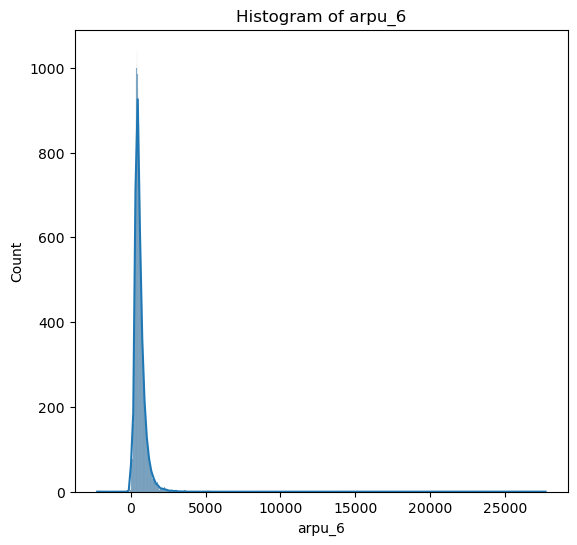


Univariate analysis for column: arpu_7
Mean: 587.4940590446284
Median: 493.207
Variance: 228942.96662613895
Std_dev: 478.4798497597772
Min: -1289.715
Max: 35145.834
Skewness: 23.022687440917146
Kurtosis: 1407.0301430867826


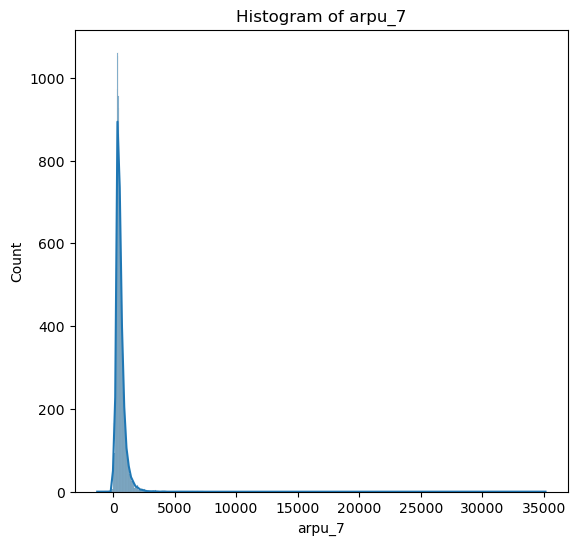


Univariate analysis for column: arpu_8
Mean: 532.9414815396327
Median: 451.818
Variance: 261432.8468883893
Std_dev: 511.30504289356395
Min: -945.808
Max: 33543.624
Skewness: 18.990273209253413
Kurtosis: 980.9581675219052


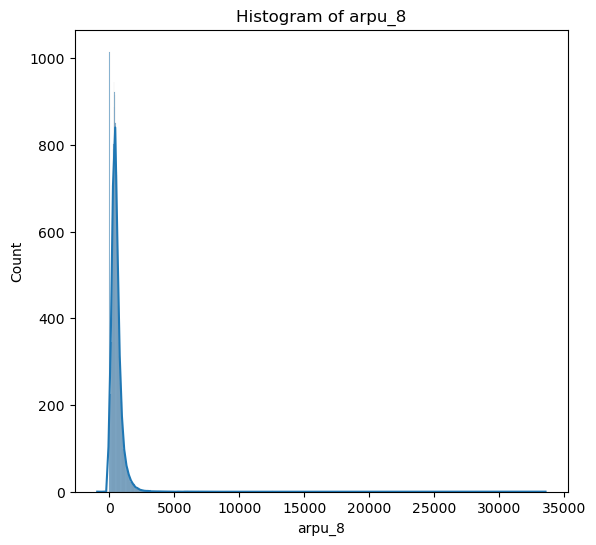


Univariate analysis for column: roam_ic_mou_6
Mean: 17.201005804548483
Median: 0.0
Variance: 6070.362042840213
Std_dev: 77.9125281507423
Min: 0.0
Max: 2613.31
Skewness: 12.145520037429028
Kurtosis: 249.7677897621405


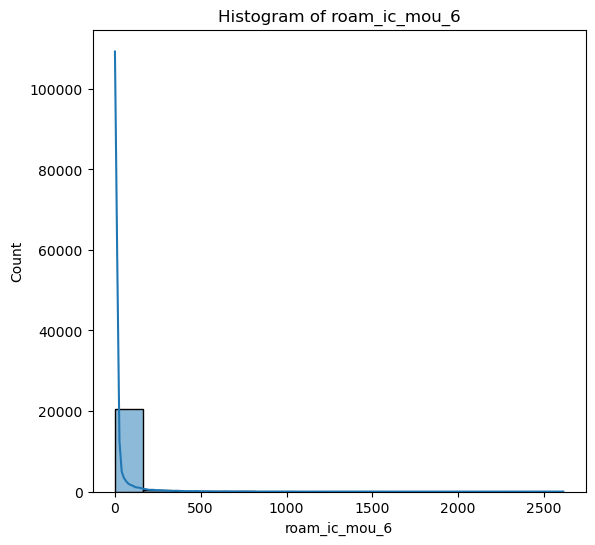


Univariate analysis for column: roam_ic_mou_7
Mean: 13.686279379579407
Median: 0.0
Variance: 6169.311048725517
Std_dev: 78.54496195635667
Min: 0.0
Max: 3813.29
Skewness: 17.8078019429944
Kurtosis: 546.0934545191924


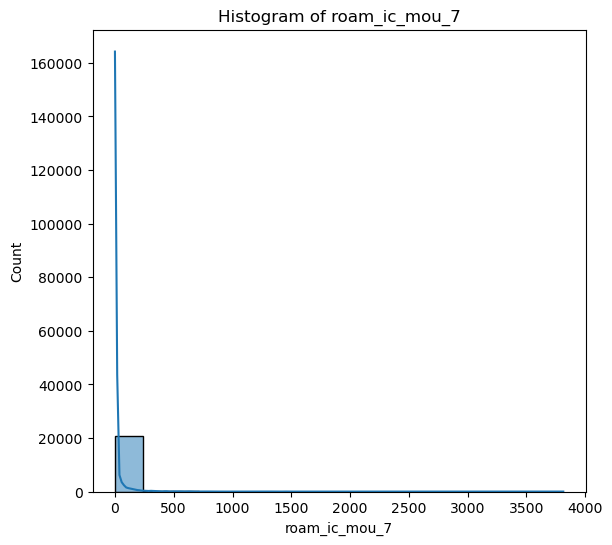


Univariate analysis for column: roam_ic_mou_8
Mean: 12.996392140070416
Median: 0.0
Variance: 5676.248024910703
Std_dev: 75.34087884349839
Min: 0.0
Max: 4169.81
Skewness: 20.111284627923414
Kurtosis: 727.4703901316171


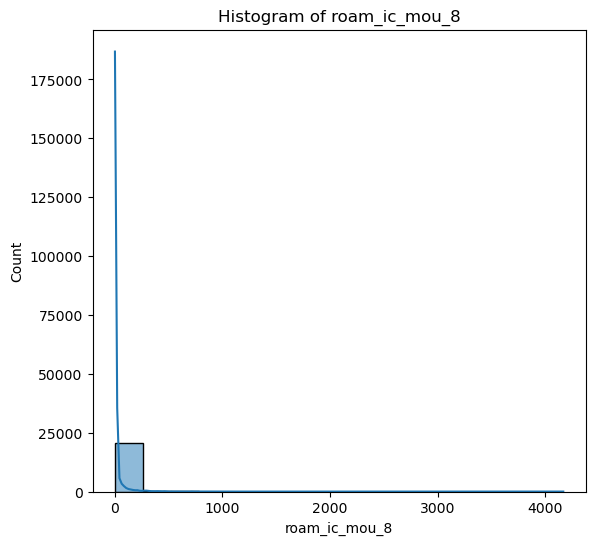


Univariate analysis for column: roam_og_mou_6
Mean: 30.067043010752688
Median: 0.0
Variance: 14917.127082243645
Std_dev: 122.13569127099434
Min: 0.0
Max: 3775.11
Skewness: 9.165638790523063
Kurtosis: 136.1130693324946


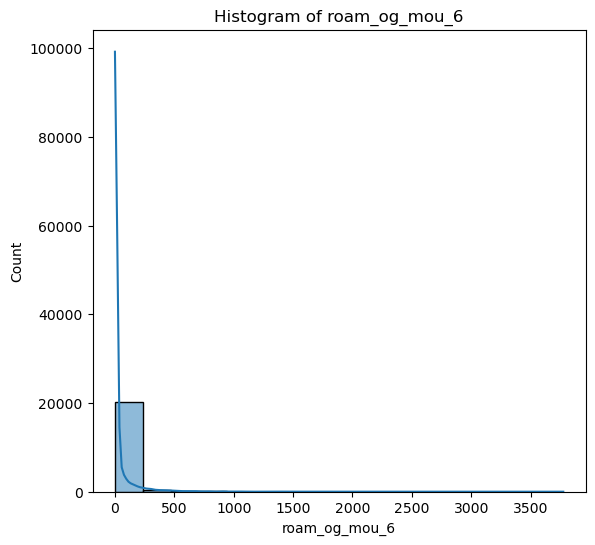


Univariate analysis for column: roam_og_mou_7
Mean: 22.115605195546674
Median: 0.0
Variance: 9607.466428091107
Std_dev: 98.01768426203053
Min: 0.0
Max: 2812.04
Skewness: 9.06119146807354
Kurtosis: 119.30489895330017


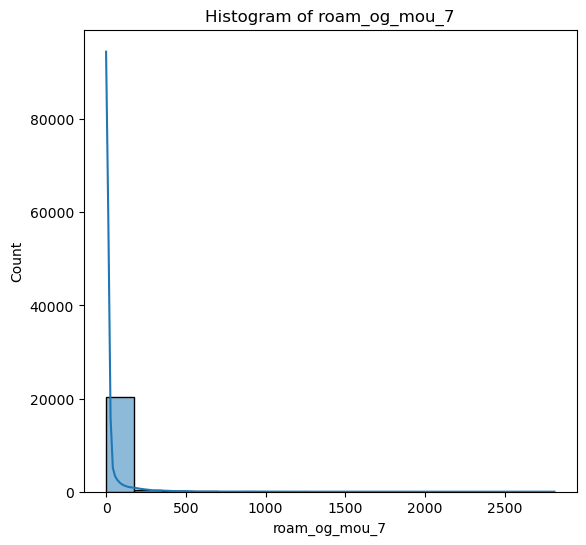


Univariate analysis for column: roam_og_mou_8
Mean: 20.85792891807023
Median: 0.0
Variance: 11230.939073197576
Std_dev: 105.97612501501258
Min: 0.0
Max: 5337.04
Skewness: 15.814697298985873
Kurtosis: 473.7852170903953


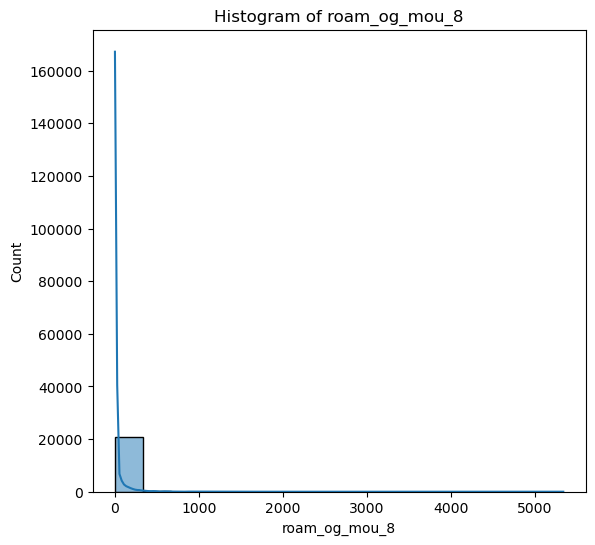


Univariate analysis for column: loc_og_t2c_mou_6
Mean: 1.5939142639642212
Median: 0.0
Variance: 55.088496078123015
Std_dev: 7.42216249337907
Min: 0.0
Max: 342.86
Skewness: 18.938078220633727
Kurtosis: 621.2331289561265


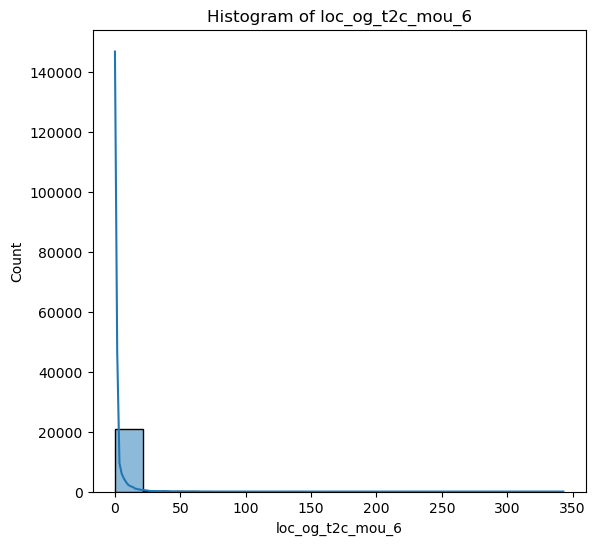


Univariate analysis for column: loc_og_t2c_mou_7
Mean: 1.8291174231611
Median: 0.0
Variance: 88.45020699093493
Std_dev: 9.404797020187885
Min: 0.0
Max: 569.71
Skewness: 27.84854127589836
Kurtosis: 1264.8224970469444


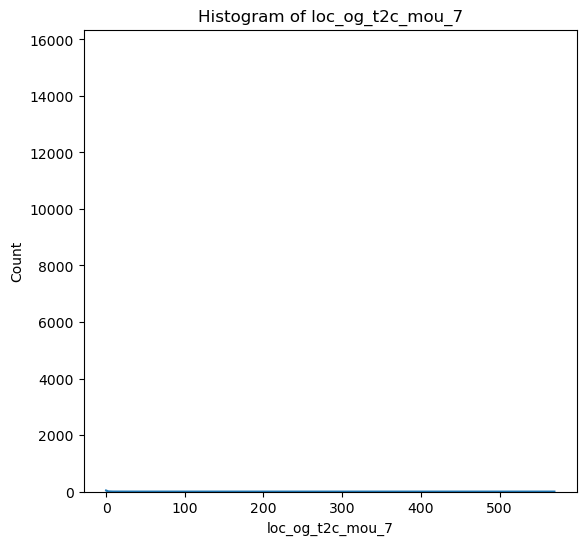


Univariate analysis for column: loc_og_t2c_mou_8
Mean: 1.6804971928822914
Median: 0.0
Variance: 52.94830528162169
Std_dev: 7.276558615281107
Min: 0.0
Max: 351.83
Skewness: 16.70876072199086
Kurtosis: 523.7609488173624


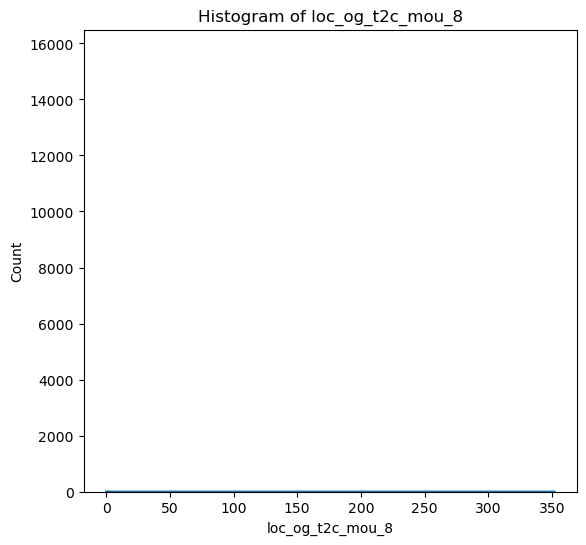


Univariate analysis for column: loc_og_mou_6
Mean: 281.95865638976113
Median: 165.935
Variance: 145709.66337488467
Std_dev: 381.7193515855394
Min: 0.0
Max: 10643.38
Skewness: 4.664580891194735
Kurtosis: 51.337458837217


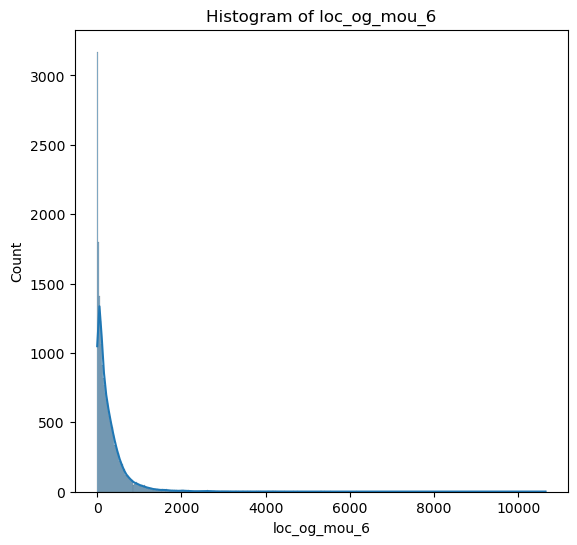


Univariate analysis for column: loc_og_mou_7
Mean: 281.9530297839947
Median: 170.505
Variance: 139582.12231072417
Std_dev: 373.6069088102148
Min: 0.0
Max: 7674.78
Skewness: 4.453547943975824
Kurtosis: 39.40108142097304


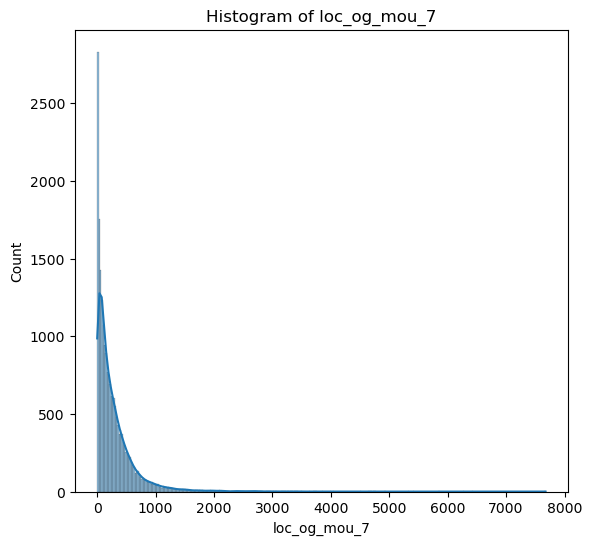


Univariate analysis for column: loc_og_mou_8
Mean: 259.2680388238653
Median: 148.435
Variance: 134706.91739229707
Std_dev: 367.0244098044394
Min: 0.0
Max: 11039.91
Skewness: 5.732387632224368
Kurtosis: 88.93232153718293


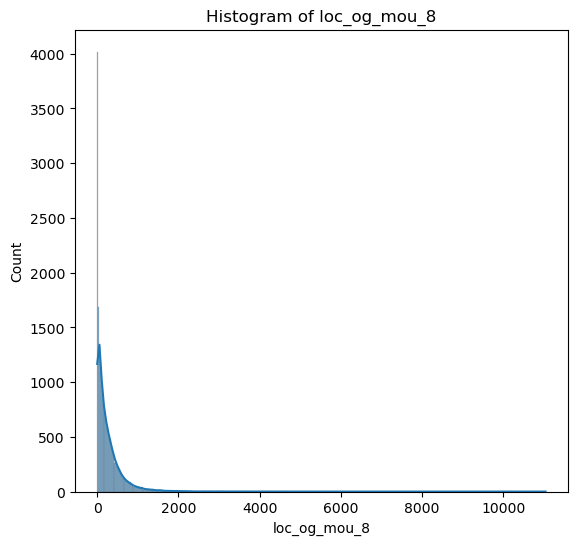


Univariate analysis for column: std_og_t2f_mou_6
Mean: 2.00457988390903
Median: 0.0
Variance: 164.20145177424754
Std_dev: 12.814111431318503
Min: 0.0
Max: 628.56
Skewness: 17.663893241831374
Kurtosis: 498.08293637997895


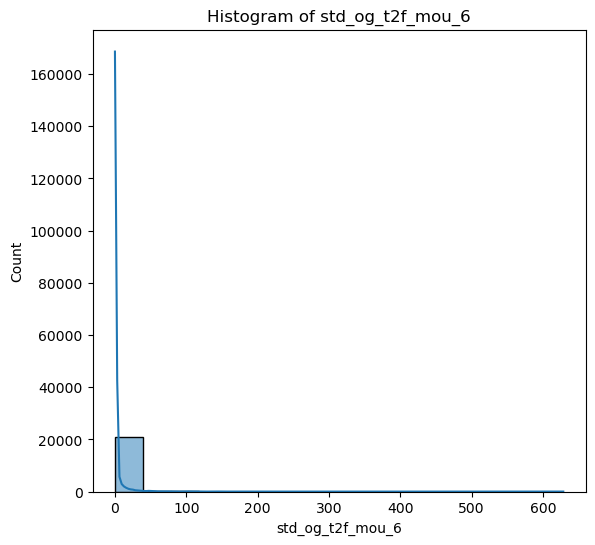


Univariate analysis for column: std_og_t2f_mou_7
Mean: 1.9303477971262728
Median: 0.0
Variance: 162.7277772068669
Std_dev: 12.756479812505757
Min: 0.0
Max: 465.79
Skewness: 17.579272954805862
Kurtosis: 442.5709750524475


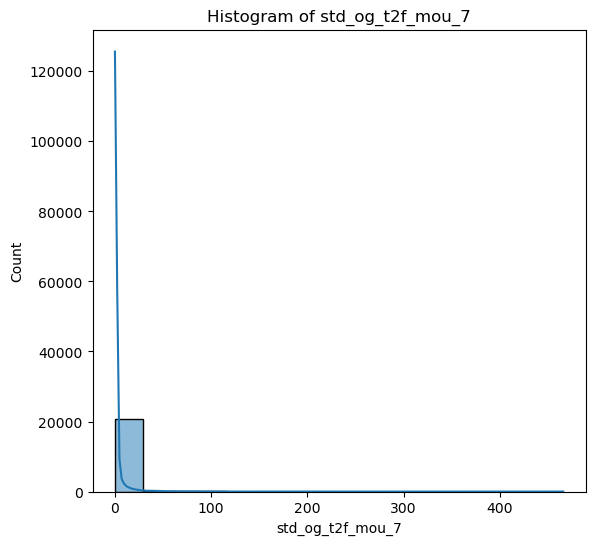


Univariate analysis for column: std_og_t2f_mou_8
Mean: 1.7518417546864595
Median: 0.0
Variance: 123.29485555531083
Std_dev: 11.103821664423057
Min: 0.0
Max: 354.16
Skewness: 14.252264893235159
Kurtosis: 278.17241549625095


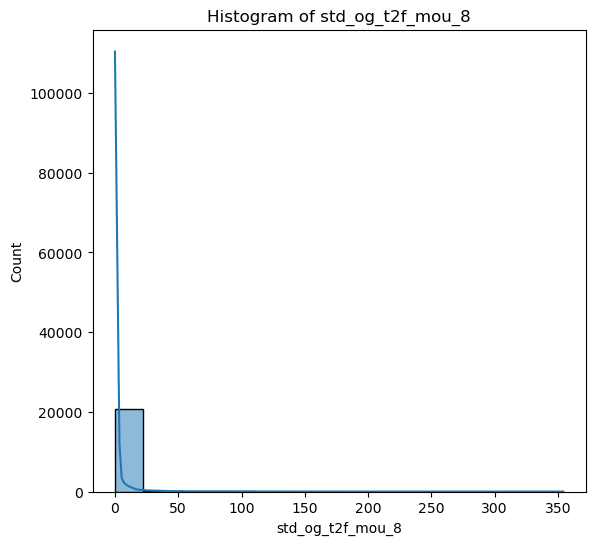


Univariate analysis for column: std_og_mou_6
Mean: 400.54285088971363
Median: 130.18
Variance: 370896.7064000312
Std_dev: 609.012895101599
Min: 0.0
Max: 8432.99
Skewness: 2.8696215038413704
Kurtosis: 13.626669355289529


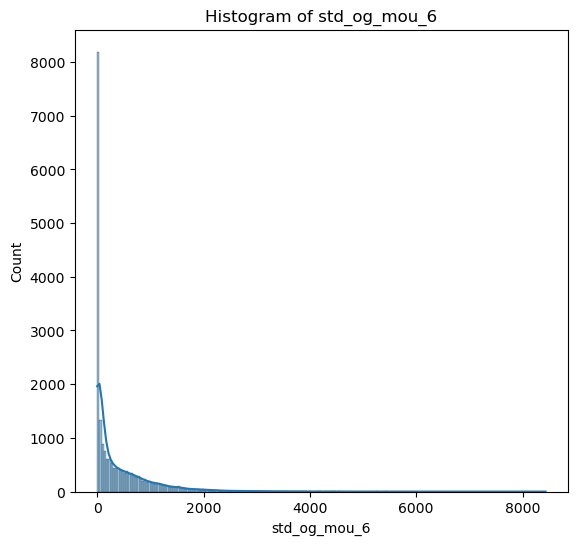


Univariate analysis for column: std_og_mou_7
Mean: 418.5112227614425
Median: 133.62
Variance: 405682.6097108774
Std_dev: 636.9321861162908
Min: 0.0
Max: 8155.53
Skewness: 2.9717331497208317
Kurtosis: 15.004301421951524


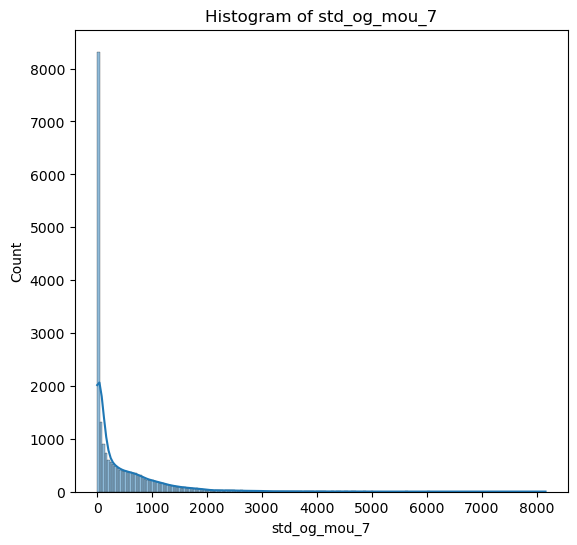


Univariate analysis for column: std_og_mou_8
Mean: 356.64584261109525
Median: 75.12
Variance: 378273.1723389353
Std_dev: 615.0391632562396
Min: 0.0
Max: 13980.06
Skewness: 3.7653343421452834
Kurtosis: 28.973973704678333


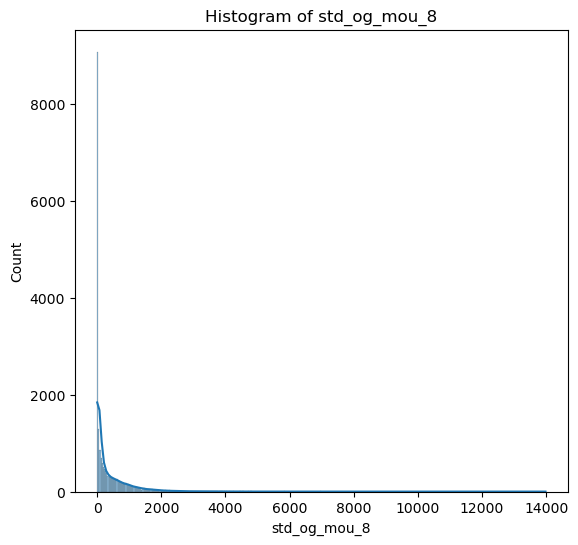


Univariate analysis for column: isd_og_mou_6
Mean: 2.4315158435626607
Median: 0.0
Variance: 2817.9614382961067
Std_dev: 53.08447455043807
Min: 0.0
Max: 5900.66
Skewness: 79.61536559474706
Kurtosis: 7976.714961807177


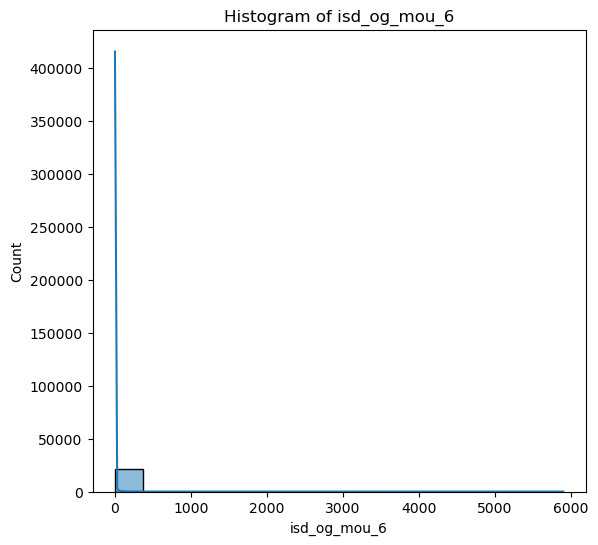


Univariate analysis for column: isd_og_mou_7
Mean: 2.339411932629175
Median: 0.0
Variance: 2721.025732956544
Std_dev: 52.16345208051844
Min: 0.0
Max: 5490.28
Skewness: 78.42582393265835
Kurtosis: 7363.720039525508


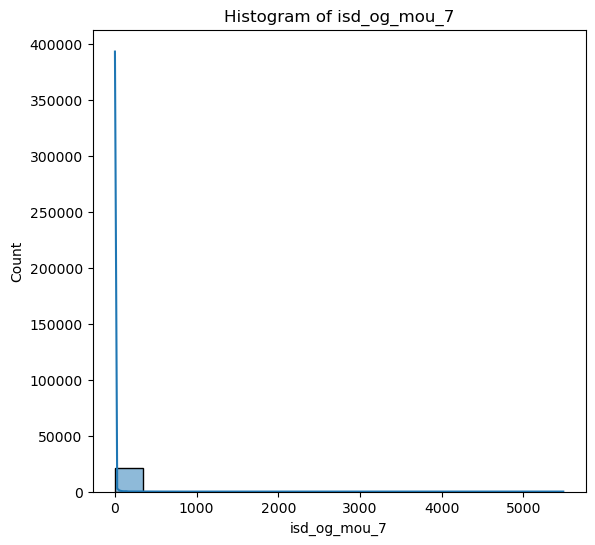


Univariate analysis for column: isd_og_mou_8
Mean: 2.214329622228566
Median: 0.0
Variance: 2704.9068834009067
Std_dev: 52.00871930167966
Min: 0.0
Max: 5681.54
Skewness: 80.73521902588428
Kurtosis: 7941.794569133059


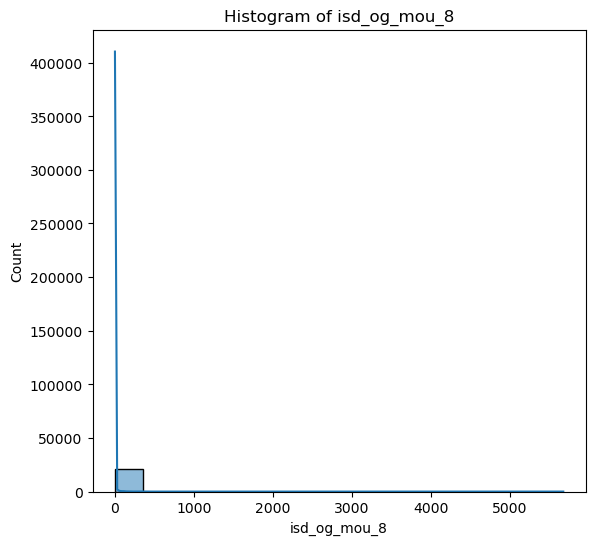


Univariate analysis for column: spl_og_mou_6
Mean: 5.974053668284328
Median: 0.2
Variance: 371.65032726032103
Std_dev: 19.27823454728988
Min: 0.0
Max: 1023.21
Skewness: 17.56161537027462
Kurtosis: 625.7368404896322


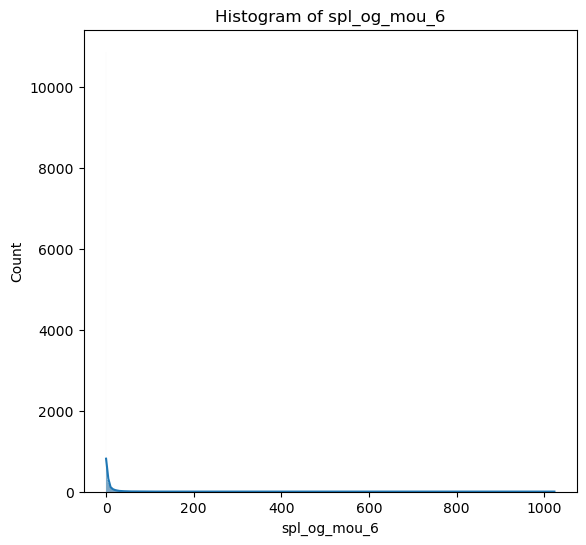


Univariate analysis for column: spl_og_mou_7
Mean: 7.402297554477115
Median: 0.75
Variance: 578.8867288647737
Std_dev: 24.060065022039606
Min: 0.0
Max: 1265.79
Skewness: 19.78885280713737
Kurtosis: 731.712624845453


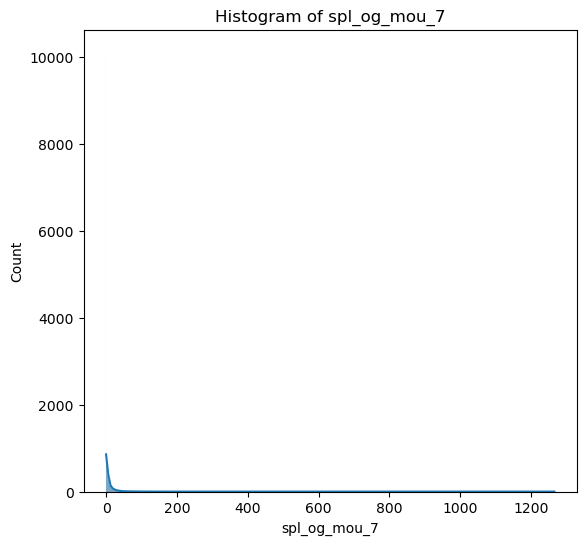


Univariate analysis for column: spl_og_mou_8
Mean: 6.901299838233895
Median: 0.5
Variance: 504.2249965974052
Std_dev: 22.45495483400947
Min: 0.0
Max: 954.51
Skewness: 14.611480974990277
Kurtosis: 363.56020412771375


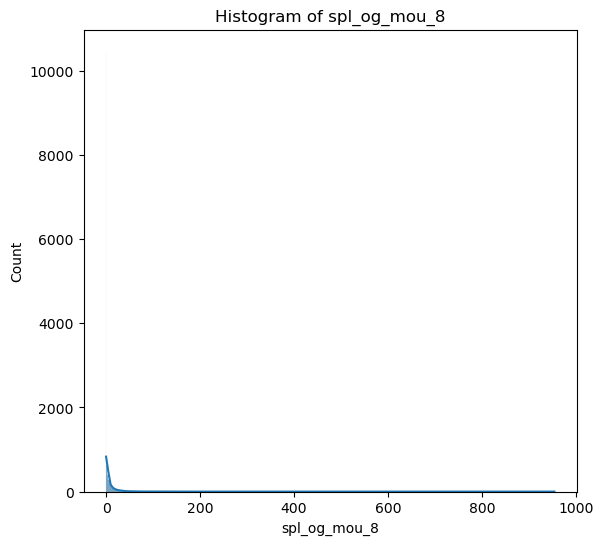


Univariate analysis for column: og_others_6
Mean: 0.6929655533352365
Median: 0.0
Variance: 4.923127689823697
Std_dev: 2.2188122250032105
Min: 0.0
Max: 74.21
Skewness: 9.352018260390103
Kurtosis: 175.11305912749233


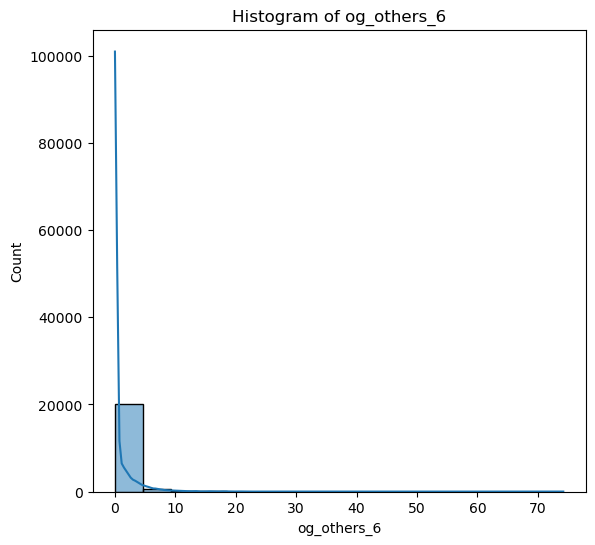


Univariate analysis for column: og_others_7
Mean: 0.03284518032162908
Median: 0.0
Variance: 2.840713853462641
Std_dev: 1.6854417383768094
Min: 0.0
Max: 221.94
Skewness: 113.07315000890576
Kurtosis: 14443.941526907543


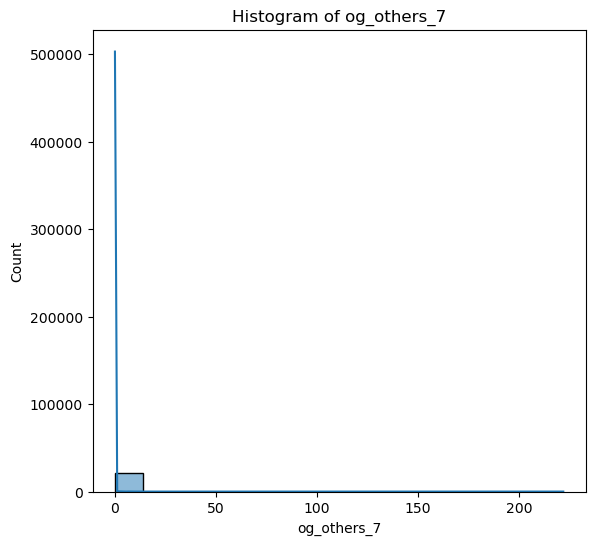


Univariate analysis for column: og_others_8
Mean: 0.05774383861452089
Median: 0.0
Variance: 9.508212942509267
Std_dev: 3.083539028861037
Min: 0.0
Max: 394.93
Skewness: 106.79634145277772
Kurtosis: 13048.447084931631


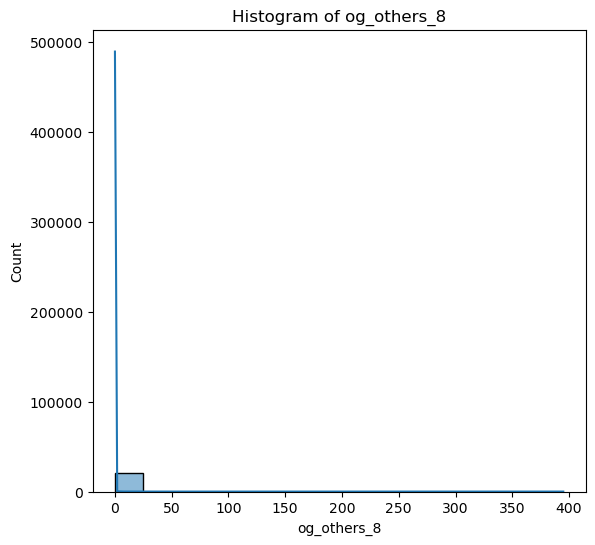


Univariate analysis for column: loc_ic_mou_6
Mean: 242.5840983918546
Median: 150.135
Variance: 95654.7618415847
Std_dev: 309.2810402232647
Min: 0.0
Max: 5852.61
Skewness: 4.0135711273052825
Kurtosis: 29.652303122611016


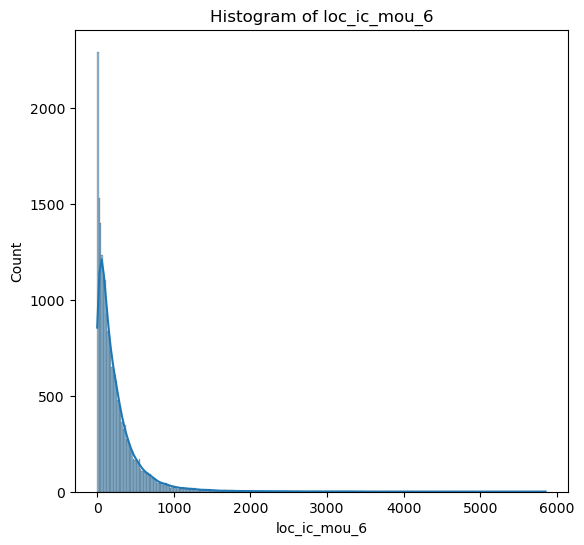


Univariate analysis for column: loc_ic_mou_7
Mean: 244.61769768769628
Median: 153.67000000000002
Variance: 93654.87267031879
Std_dev: 306.0308361428939
Min: 0.0
Max: 6466.74
Skewness: 4.2131592044424915
Kurtosis: 34.951660713782715


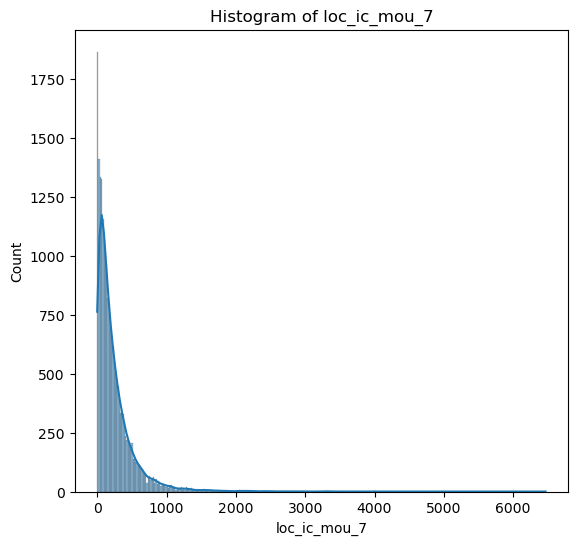


Univariate analysis for column: loc_ic_mou_8
Mean: 232.02999191169474
Median: 142.7
Variance: 90212.03703129137
Std_dev: 300.35318715021384
Min: 0.0
Max: 5748.81
Skewness: 4.0594386488589755
Kurtosis: 32.050470762745064


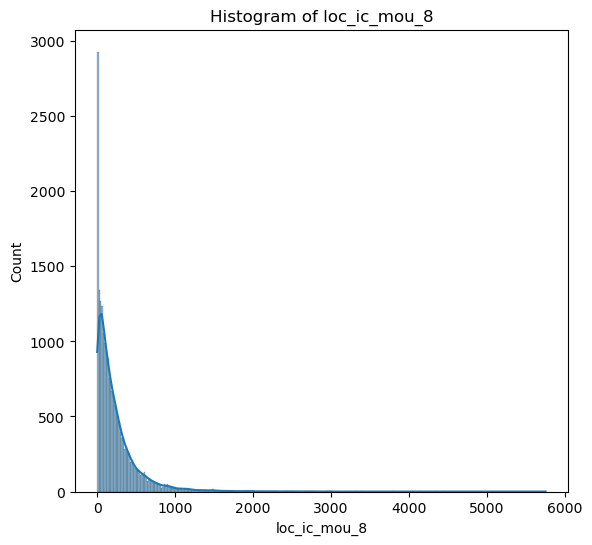


Univariate analysis for column: std_ic_t2t_mou_6
Mean: 15.813055000475781
Median: 1.06
Variance: 5046.149441420357
Std_dev: 71.03625441575842
Min: 0.0
Max: 3038.34
Skewness: 19.06745315622499
Kurtosis: 562.7673766379124


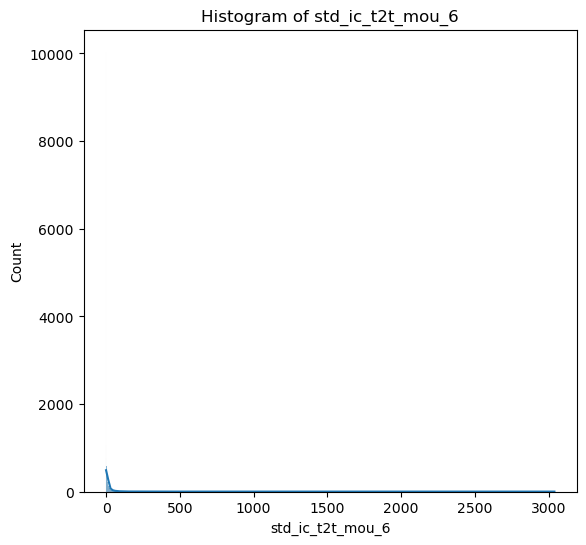


Univariate analysis for column: std_ic_t2t_mou_7
Mean: 16.499474260157957
Median: 1.19
Variance: 6764.641282908831
Std_dev: 82.247439369921
Min: 0.0
Max: 4708.71
Skewness: 27.424528202319923
Kurtosis: 1170.1282716047342


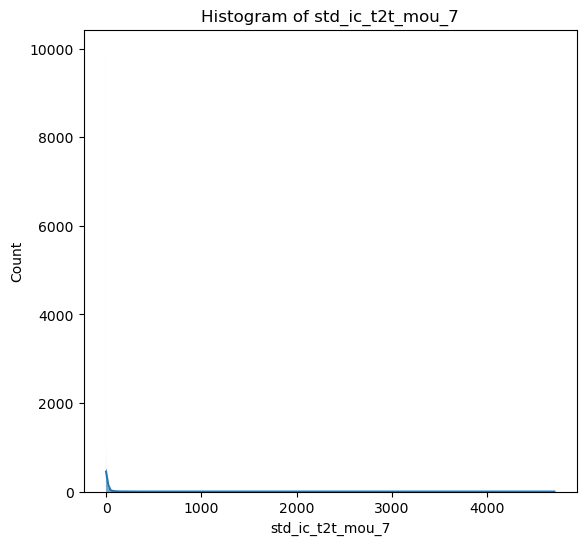


Univariate analysis for column: std_ic_t2t_mou_8
Mean: 14.86157721952612
Median: 0.55
Variance: 4795.431812218331
Std_dev: 69.24905639947978
Min: 0.0
Max: 3423.39
Skewness: 20.239643120361606
Kurtosis: 654.5047768961899


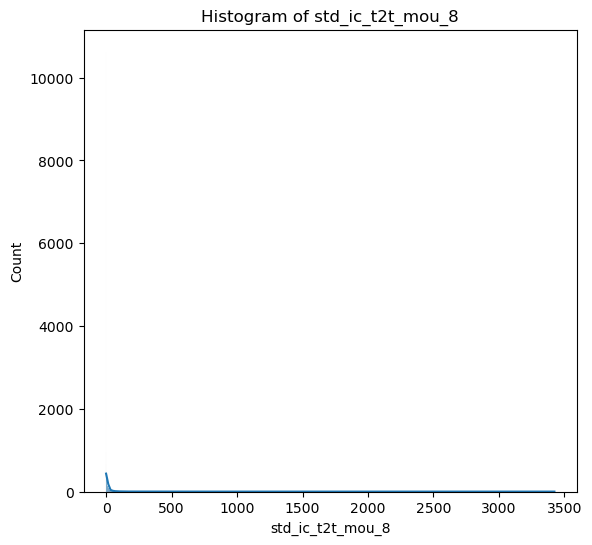


Univariate analysis for column: std_ic_t2f_mou_6
Mean: 2.8984793986107147
Median: 0.0
Variance: 434.273804272746
Std_dev: 20.839237132696244
Min: 0.0
Max: 1351.11
Skewness: 30.16704140321273
Kurtosis: 1416.6096261765315


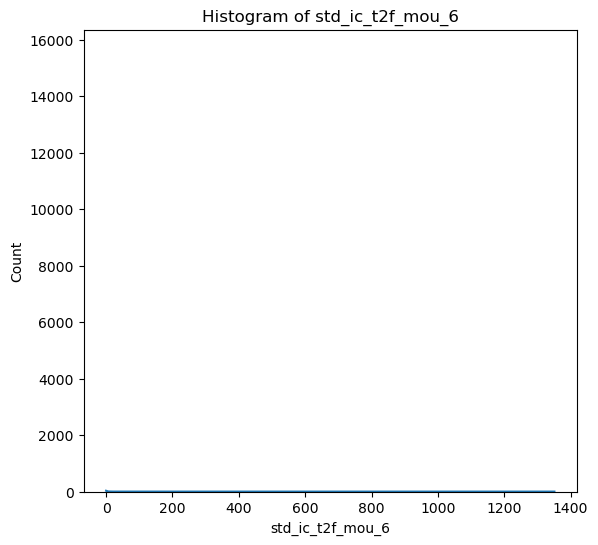


Univariate analysis for column: std_ic_t2f_mou_7
Mean: 2.982596345989152
Median: 0.0
Variance: 377.93983729437923
Std_dev: 19.440674815817975
Min: 0.0
Max: 1136.08
Skewness: 26.203712523815046
Kurtosis: 1110.4474093984277


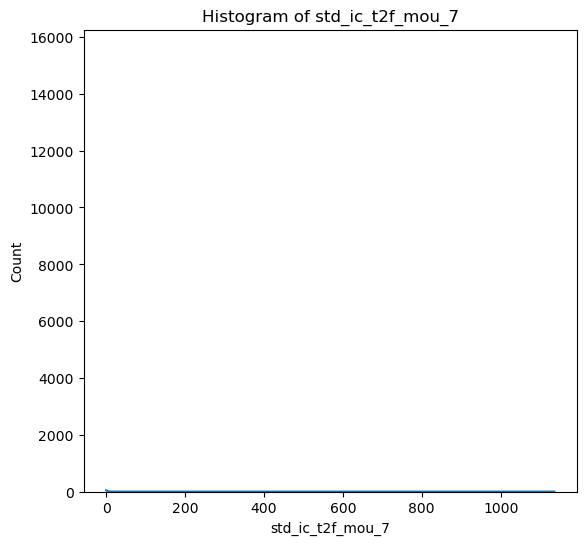


Univariate analysis for column: std_ic_t2f_mou_8
Mean: 2.620437244266819
Median: 0.0
Variance: 381.8989216862201
Std_dev: 19.542234306399564
Min: 0.0
Max: 1394.89
Skewness: 34.72200691840672
Kurtosis: 1839.4290309586104


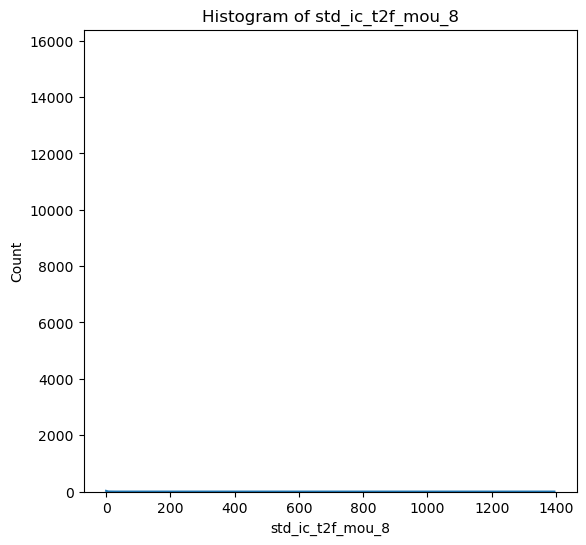


Univariate analysis for column: std_ic_mou_6
Mean: 50.60215910172234
Median: 15.01
Variance: 17710.563648142706
Std_dev: 133.0810416556119
Min: 0.0
Max: 3929.24
Skewness: 9.612811866132473
Kurtosis: 151.59128599149798


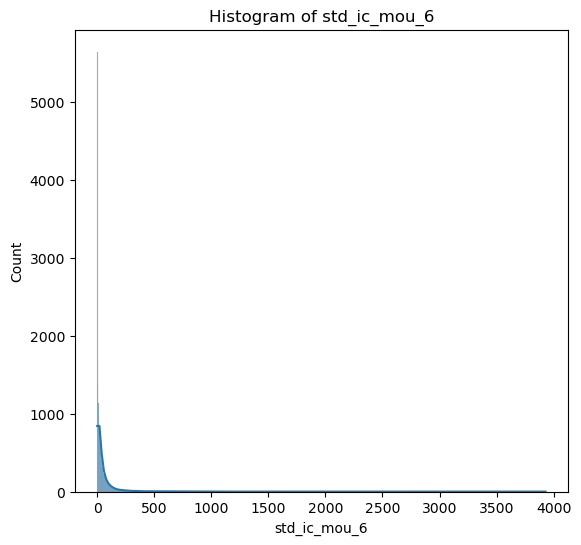


Univariate analysis for column: std_ic_mou_7
Mean: 52.62330906841755
Median: 16.19
Variance: 21445.79797386742
Std_dev: 146.44383897544964
Min: 0.0
Max: 6745.76
Skewness: 13.515896029240782
Kurtosis: 355.1488865162506


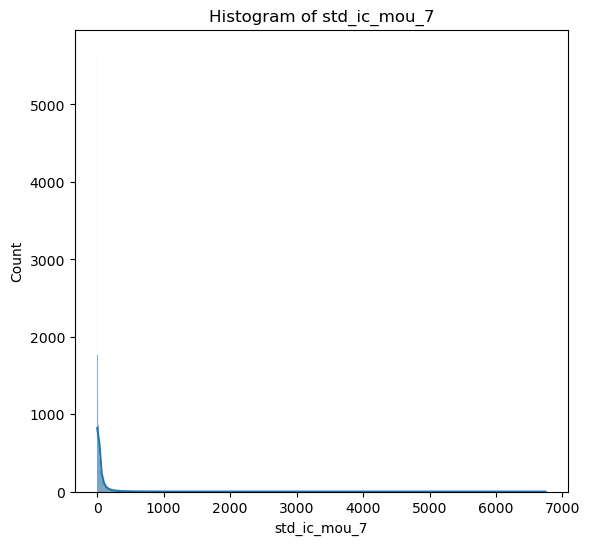


Univariate analysis for column: std_ic_mou_8
Mean: 47.37692596821772
Median: 12.51
Variance: 17523.340244958494
Std_dev: 132.37575399203018
Min: 0.0
Max: 3777.94
Skewness: 10.316321465172884
Kurtosis: 168.3380816648443


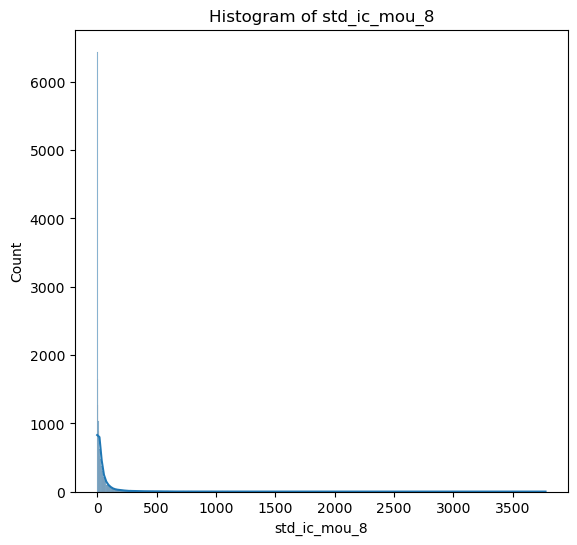


Univariate analysis for column: spl_ic_mou_6
Mean: 0.0676800837377486
Median: 0.0
Variance: 0.04166540804506865
Std_dev: 0.20412106222795492
Min: 0.0
Max: 19.76
Skewness: 43.8008205235297
Kurtosis: 4122.728794385772


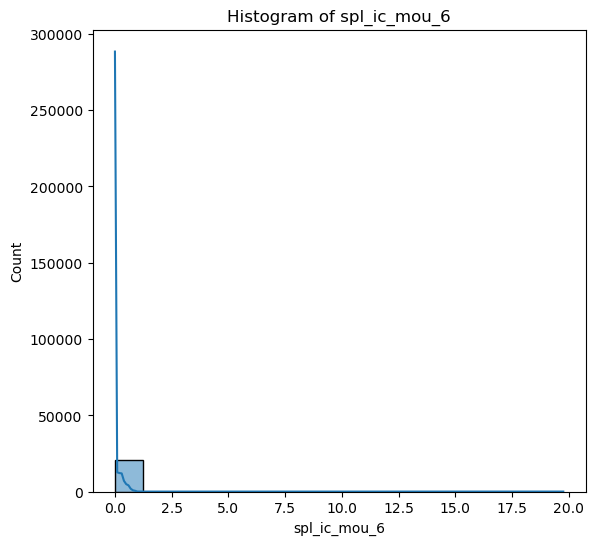


Univariate analysis for column: spl_ic_mou_7
Mean: 0.0175482919402417
Median: 0.0
Variance: 0.020118197815279546
Std_dev: 0.1418386330139978
Min: 0.0
Max: 13.46
Skewness: 51.16359960396471
Kurtosis: 4263.61347267775


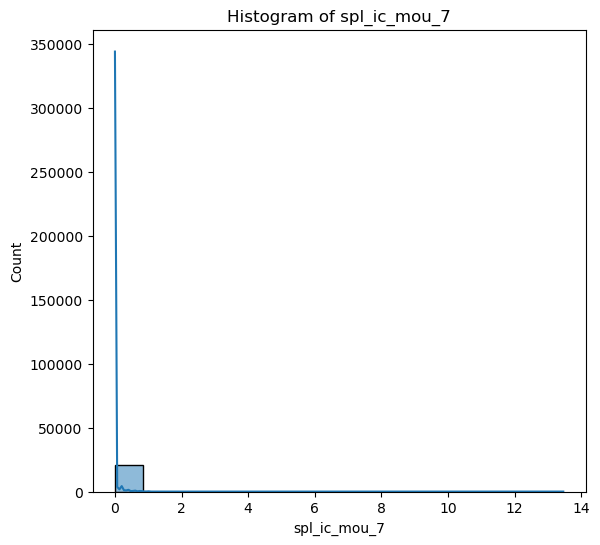


Univariate analysis for column: spl_ic_mou_8
Mean: 0.027904653154439053
Median: 0.0
Variance: 0.01251614031141578
Std_dev: 0.1118755572563363
Min: 0.0
Max: 1.26
Skewness: 4.8234571162971225
Kurtosis: 25.68714241279437


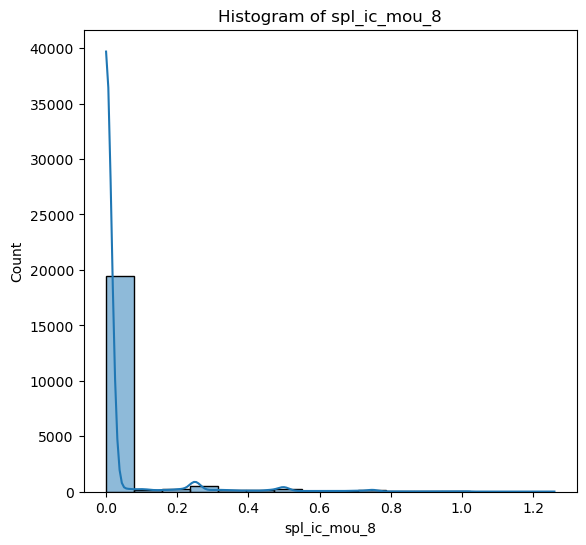


Univariate analysis for column: isd_ic_mou_6
Mean: 10.706466837948426
Median: 0.0
Variance: 3919.112865577687
Std_dev: 62.6028183517139
Min: 0.0
Max: 2138.98
Skewness: 14.183701971003579
Kurtosis: 284.99158002860565


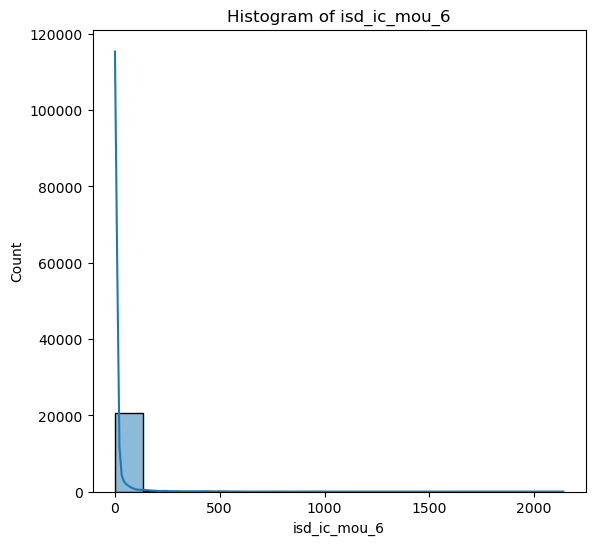


Univariate analysis for column: isd_ic_mou_7
Mean: 11.911262727186221
Median: 0.0
Variance: 4733.044529900153
Std_dev: 68.79712588400879
Min: 0.0
Max: 2631.34
Skewness: 15.165296430253074
Kurtosis: 346.33655961267834


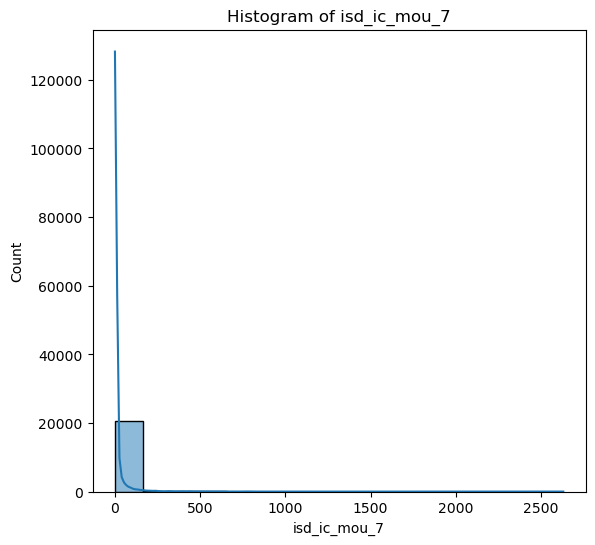


Univariate analysis for column: isd_ic_mou_8
Mean: 11.452650585212675
Median: 0.0
Variance: 4971.143183197474
Std_dev: 70.50633434803908
Min: 0.0
Max: 3432.88
Skewness: 17.394712556420593
Kurtosis: 497.64319689995824


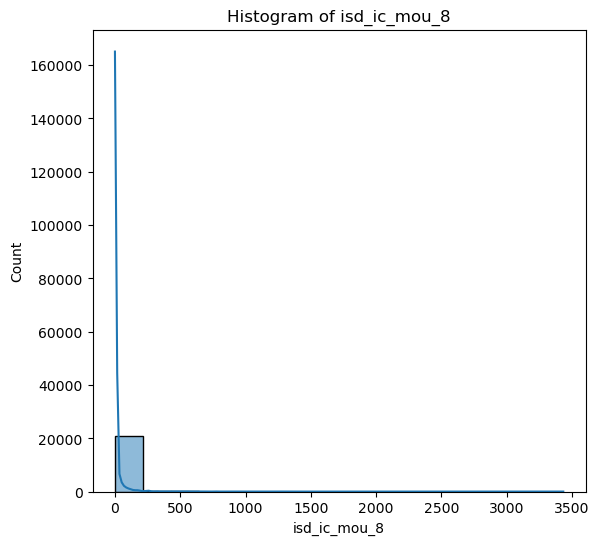


Univariate analysis for column: ic_others_6
Mean: 1.2176020553811018
Median: 0.0
Variance: 252.33202195101111
Std_dev: 15.884962132501641
Min: 0.0
Max: 1344.14
Skewness: 56.23398961461962
Kurtosis: 4082.223034514551


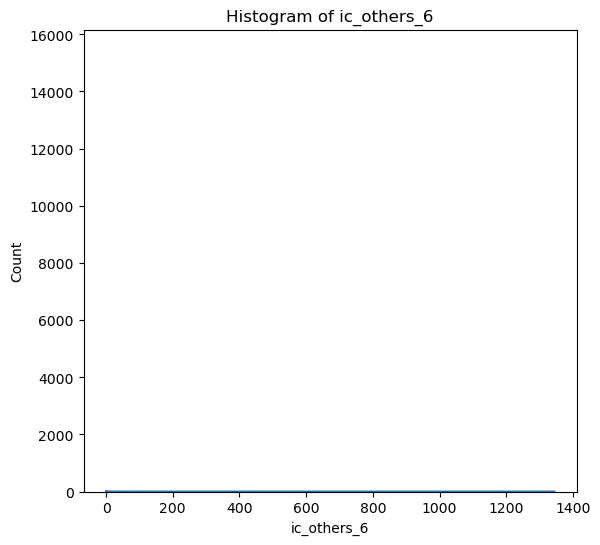


Univariate analysis for column: ic_others_7
Mean: 1.4794105052811874
Median: 0.0
Variance: 271.3672392347347
Std_dev: 16.473227954312254
Min: 0.0
Max: 1495.94
Skewness: 48.761577277197276
Kurtosis: 3592.4068464100087


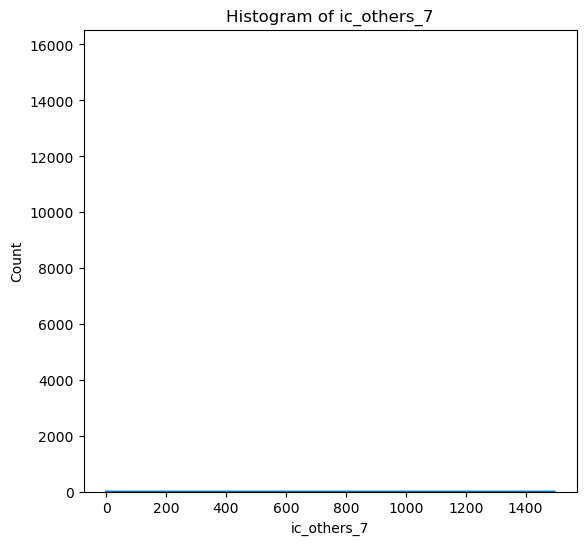


Univariate analysis for column: ic_others_8
Mean: 1.2542230469121707
Median: 0.0
Variance: 199.13041067529196
Std_dev: 14.111357506465916
Min: 0.0
Max: 1209.86
Skewness: 47.70431296506829
Kurtosis: 3214.0814803588246


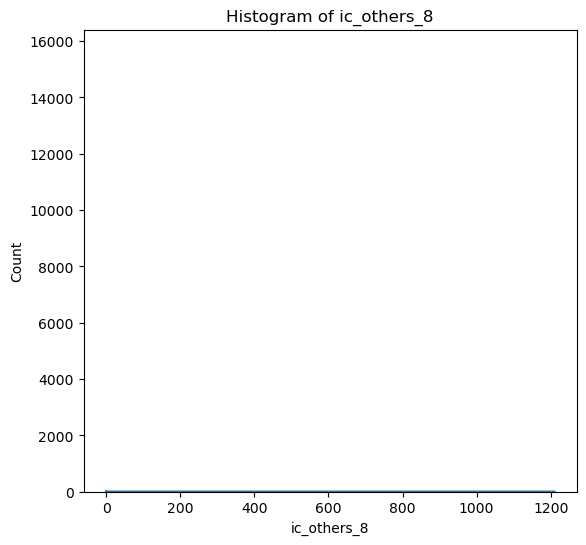


Univariate analysis for column: total_rech_num_6
Mean: 12.141545342087735
Median: 9.0
Variance: 89.18427475887907
Std_dev: 9.44374262455723
Min: 0
Max: 170
Skewness: 2.8724175789089794
Kurtosis: 16.433741619390805


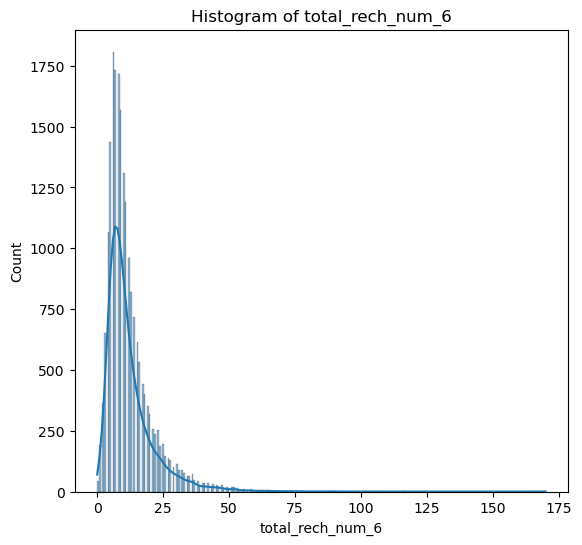


Univariate analysis for column: total_rech_num_7
Mean: 11.9153106860786
Median: 9.0
Variance: 91.3495386126095
Std_dev: 9.557695256316217
Min: 0
Max: 138
Skewness: 2.648554255530566
Kurtosis: 12.536973430441666


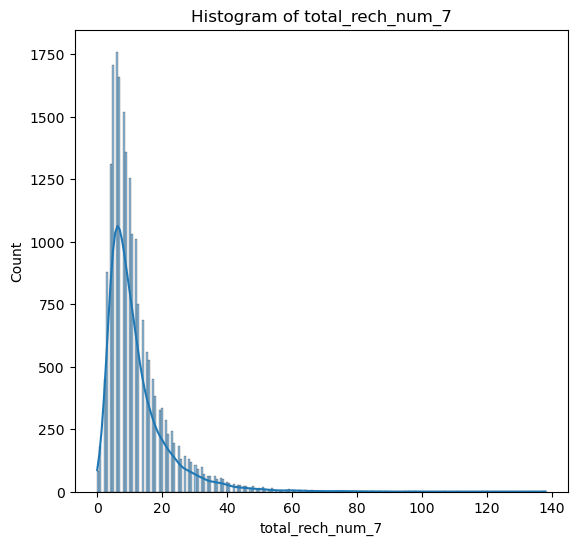


Univariate analysis for column: total_rech_num_8
Mean: 10.214102198115901
Median: 8.0
Variance: 89.05678927099649
Std_dev: 9.436990477424278
Min: 0
Max: 138
Skewness: 2.752093764030895
Kurtosis: 13.92513400505992


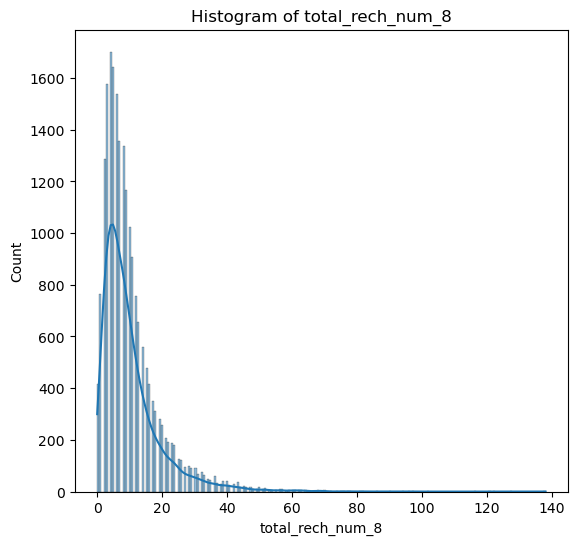


Univariate analysis for column: max_rech_amt_6
Mean: 170.89670758397563
Median: 120.0
Variance: 31235.883463488542
Std_dev: 176.73676319172688
Min: 0
Max: 4010
Skewness: 5.887652023260873
Kurtosis: 66.39998350568902


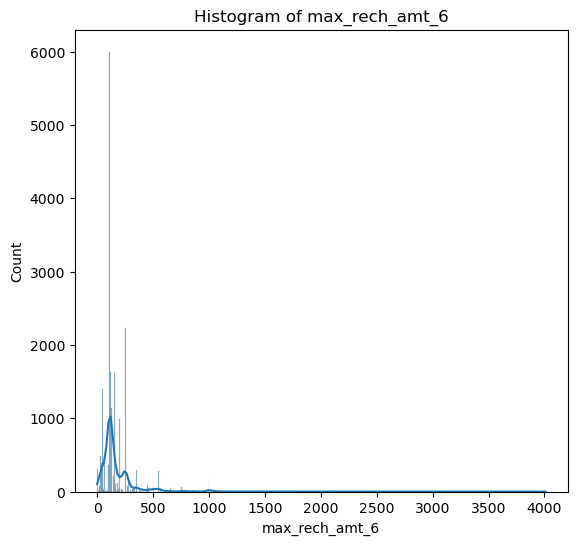


Univariate analysis for column: max_rech_amt_7
Mean: 173.93843372347513
Median: 128.0
Variance: 30143.68921983253
Std_dev: 173.61938031173977
Min: 0
Max: 3299
Skewness: 4.785119856447053
Kurtosis: 40.278637194199845


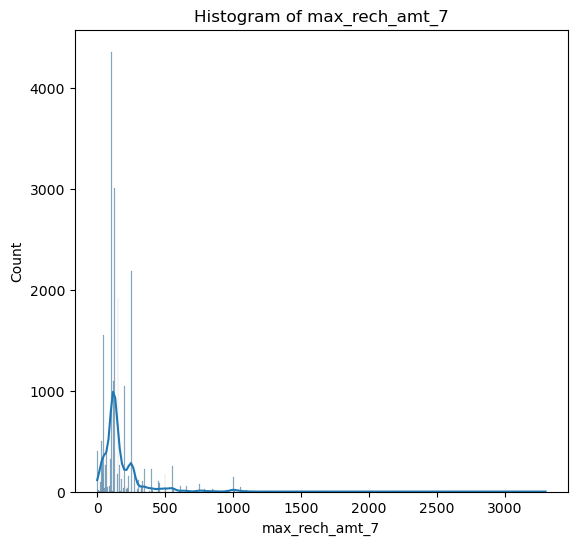


Univariate analysis for column: max_rech_amt_8
Mean: 162.0273575030926
Median: 130.0
Variance: 28055.827438237862
Std_dev: 167.49873861685603
Min: 0
Max: 4449
Skewness: 5.6436639075496124
Kurtosis: 70.6533735235288


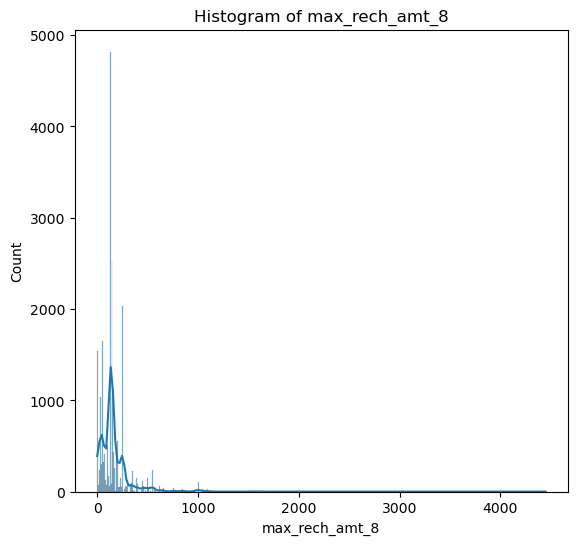


Univariate analysis for column: last_day_rch_amt_6
Mean: 104.8460843086878
Median: 110.0
Variance: 20739.136369736265
Std_dev: 144.01088976093533
Min: 0
Max: 4010
Skewness: 7.002179247800432
Kurtosis: 101.00611495625577


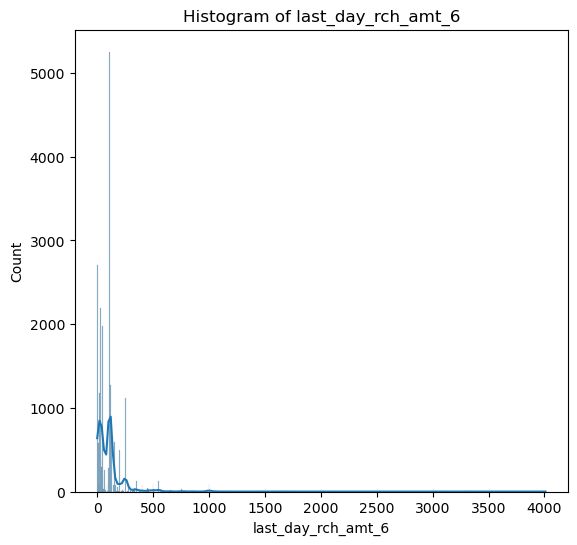


Univariate analysis for column: last_day_rch_amt_7
Mean: 104.4626034827291
Median: 91.0
Variance: 19583.07185165944
Std_dev: 139.93952926767847
Min: 0
Max: 3100
Skewness: 5.540838719014803
Kurtosis: 60.830460679998026


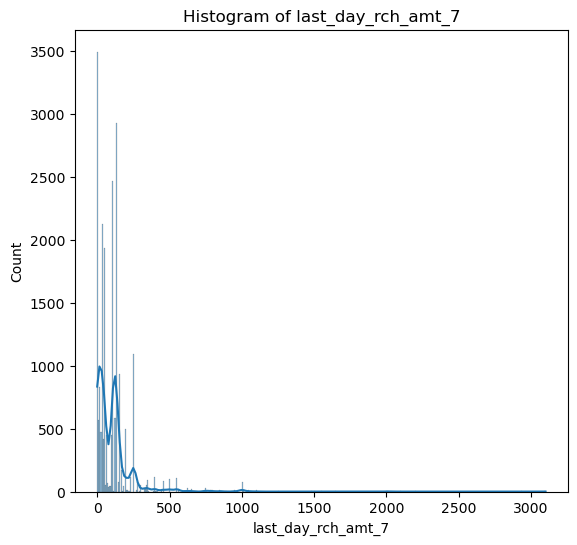


Univariate analysis for column: last_day_rch_amt_8
Mean: 95.03820534779713
Median: 50.0
Variance: 19529.994591099916
Std_dev: 139.74975703413554
Min: 0
Max: 4449
Skewness: 6.972526188850131
Kurtosis: 118.32108710947278


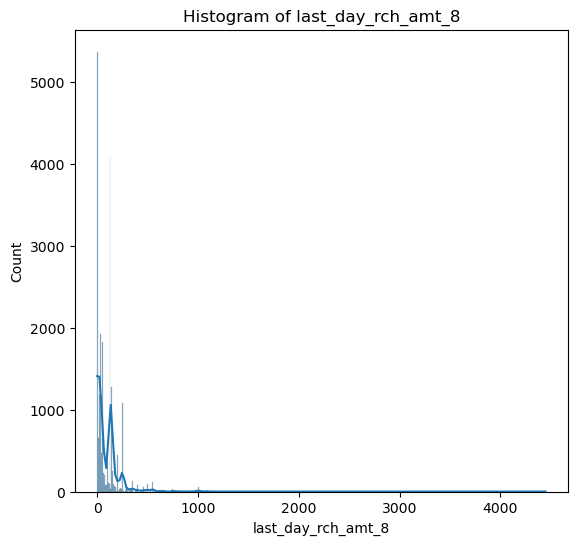


Univariate analysis for column: vol_2g_mb_6
Mean: 78.13090446284137
Median: 0.0
Variance: 77646.94213726647
Std_dev: 278.6520090314557
Min: 0.0
Max: 10285.9
Skewness: 9.189027690988693
Kurtosis: 168.47574546065852


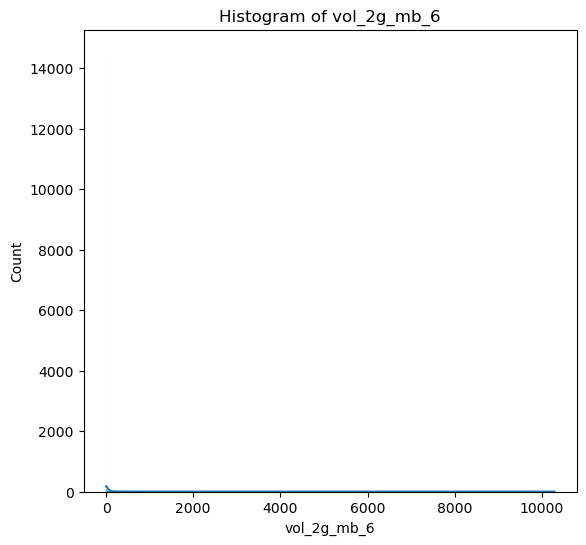


Univariate analysis for column: vol_2g_mb_7
Mean: 77.72185079455704
Median: 0.0
Variance: 76913.385864586
Std_dev: 277.3326267581692
Min: 0.0
Max: 7873.55
Skewness: 7.716579102813914
Kurtosis: 98.4680065024498


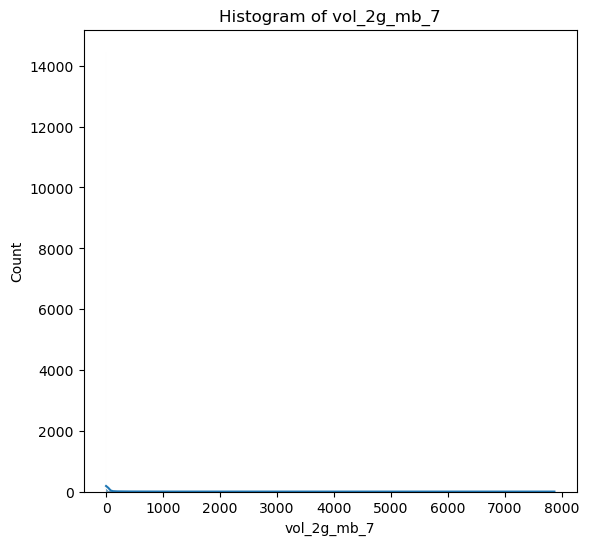


Univariate analysis for column: vol_2g_mb_8
Mean: 69.04619516604815
Median: 0.0
Variance: 73521.18524090227
Std_dev: 271.14790288863065
Min: 0.0
Max: 11117.61
Skewness: 10.96172732481022
Kurtosis: 245.18259399596607


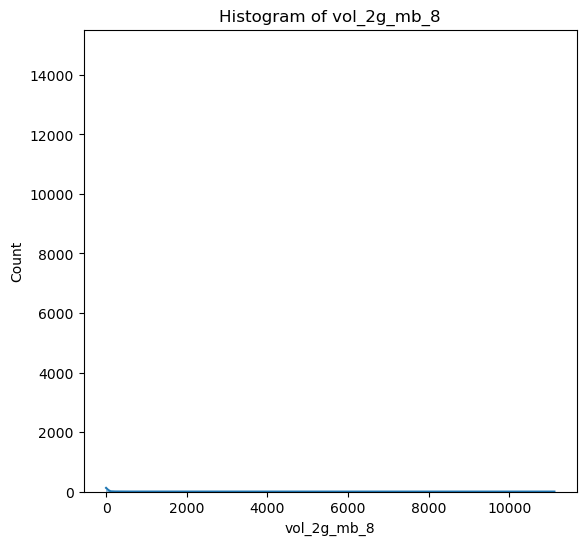


Univariate analysis for column: aon
Mean: 1267.7460272147682
Median: 926.0
Variance: 946964.4432741726
Std_dev: 973.1209808005234
Min: 180
Max: 4321
Skewness: 0.8872074441232687
Kurtosis: -0.4039687365796789


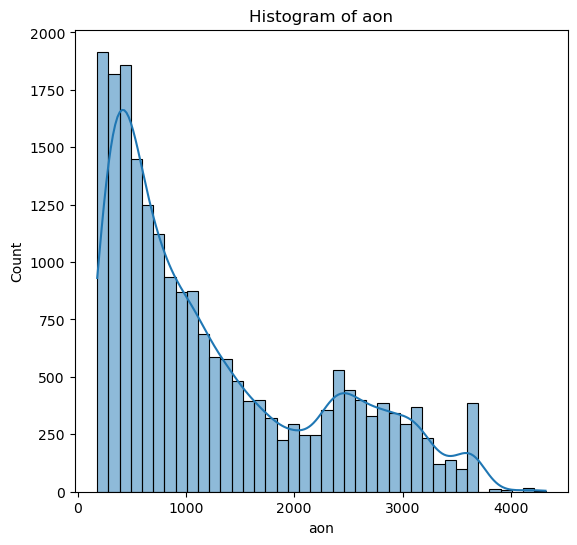


Univariate analysis for column: aug_vbc_3g
Mean: 128.08323817680085
Median: 0.0
Variance: 153365.98278337545
Std_dev: 391.6196915163683
Min: 0.0
Max: 12916.22
Skewness: 6.978509738384915
Kurtosis: 102.65192068577187


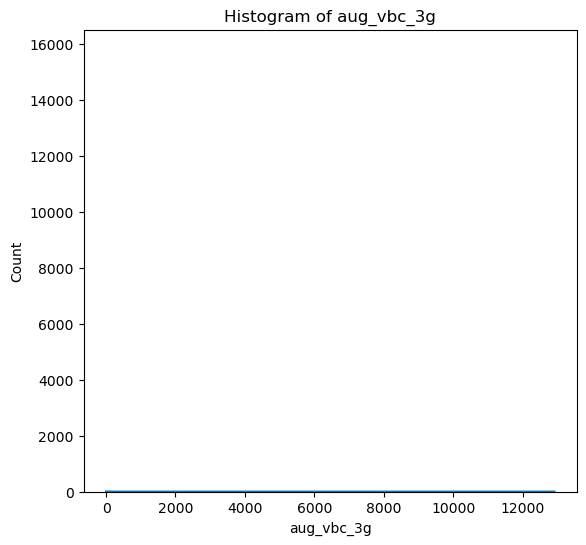


Univariate analysis for column: jul_vbc_3g
Mean: 132.61392996479208
Median: 0.0
Variance: 164183.40850847628
Std_dev: 405.1955188652464
Min: 0.0
Max: 9165.6
Skewness: 6.086652857336276
Kurtosis: 62.48610507161943


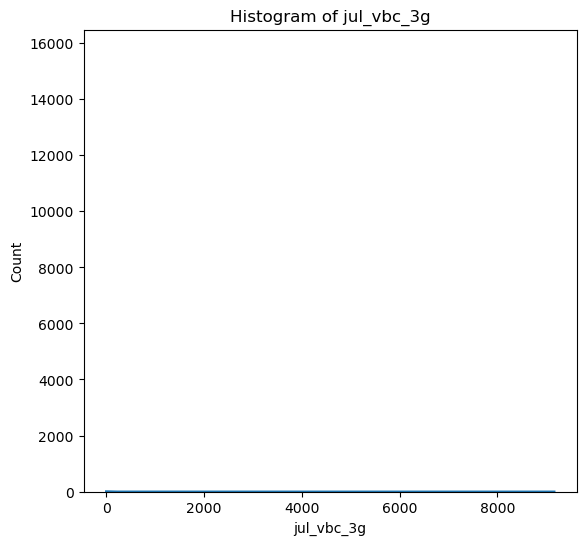


Univariate analysis for column: jun_vbc_3g
Mean: 121.5587900846893
Median: 0.0
Variance: 157749.731423353
Std_dev: 397.17720405802874
Min: 0.0
Max: 11166.21
Skewness: 7.030391175407393
Kurtosis: 86.64342912880383


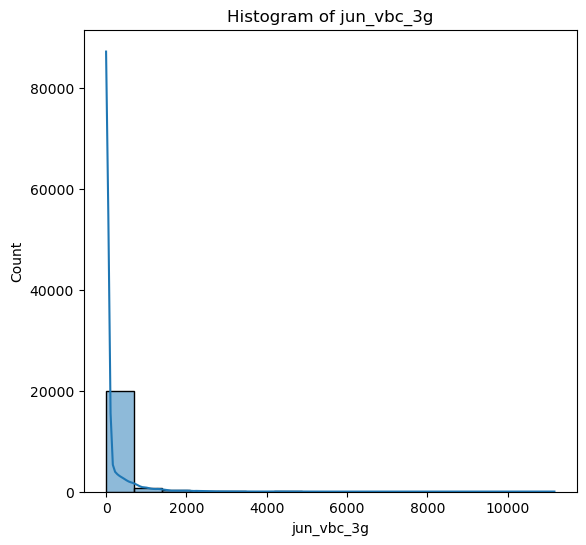


Univariate analysis for column: Average_rech_amt_6n7
Mean: 695.8073318108288
Median: 568.0
Variance: 252746.59590046934
Std_dev: 502.7390932685356
Min: 370.0
Max: 37762.5
Skewness: 24.58386025007818
Kurtosis: 1524.8194559162043


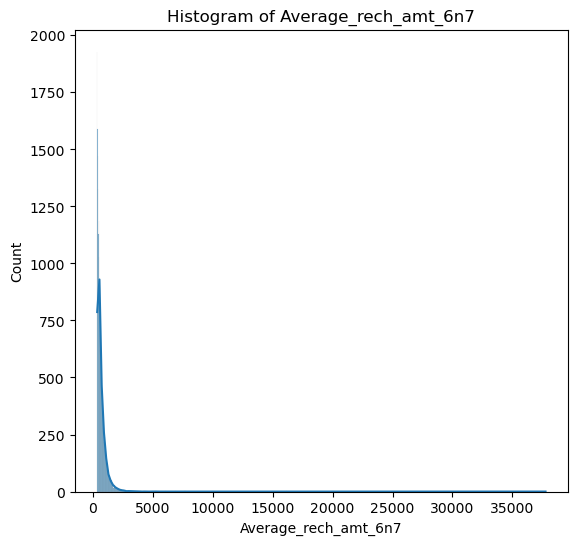


Univariate analysis for column: total_mou_6
Mean: 719.6414035588543
Median: 540.8299999999999
Variance: 441359.59290656477
Std_dev: 664.3489993268333
Min: 0.0
Max: 10673.279999999999
Skewness: 2.6464533817396774
Kurtosis: 13.224508650126289


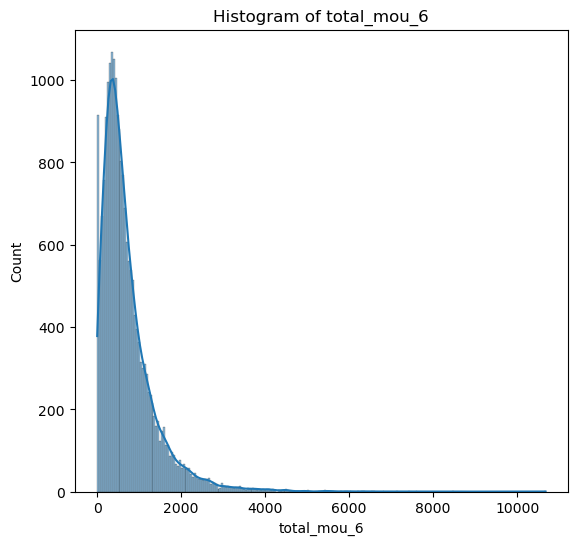


Univariate analysis for column: total_mou_7
Mean: 729.5738980873537
Median: 545.3299999999999
Variance: 467661.3499944179
Std_dev: 683.8576971815247
Min: 0.0
Max: 8235.71
Skewness: 2.7188005179346924
Kurtosis: 13.28109321721767


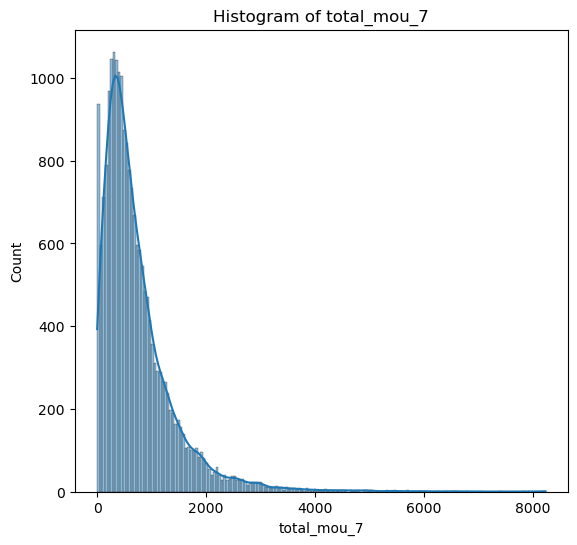


Univariate analysis for column: total_mou_8
Mean: 643.3633081168521
Median: 452.65
Variance: 477595.1294193899
Std_dev: 691.0825778583844
Min: 0.0
Max: 14043.05
Skewness: 3.295557308278242
Kurtosis: 24.195865545002622


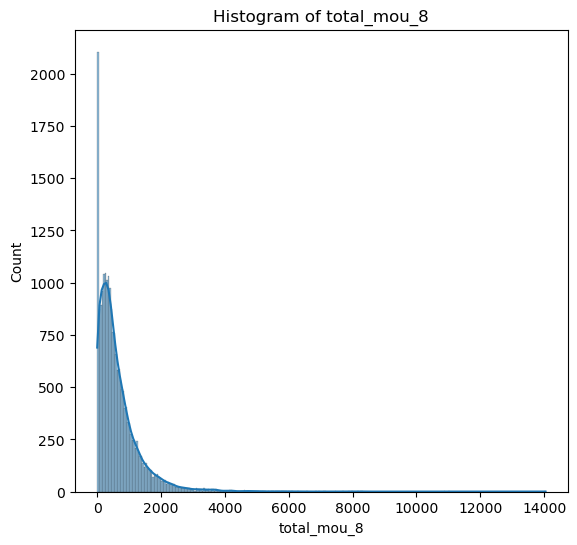

In [74]:
analysis_results = univariate_analysis(df, numerical_columns)


Univariate analysis for column: monthly_2g_6
Frequency Distribution:
monthly_2g_6
0    18713
1     2054
2      227
3       18
4        6
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_6
0    0.890332
1    0.097726
2    0.010800
3    0.000856
4    0.000285
Name: proportion, dtype: float64


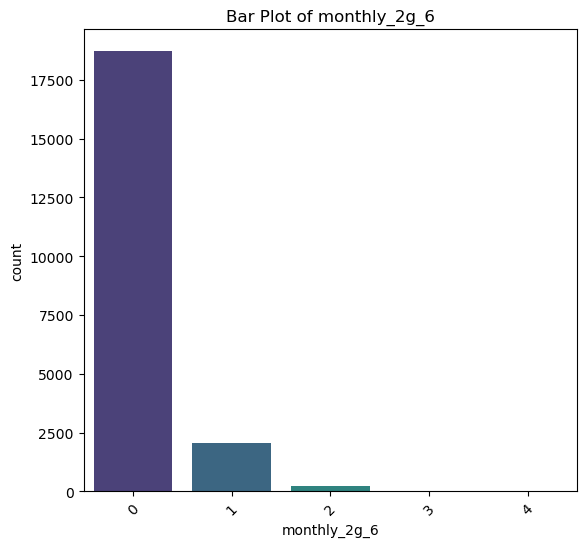


Univariate analysis for column: monthly_2g_7
Frequency Distribution:
monthly_2g_7
0    18599
1     2116
2      275
3       24
4        3
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_7
0    0.884908
1    0.100676
2    0.013084
3    0.001142
4    0.000143
5    0.000048
Name: proportion, dtype: float64


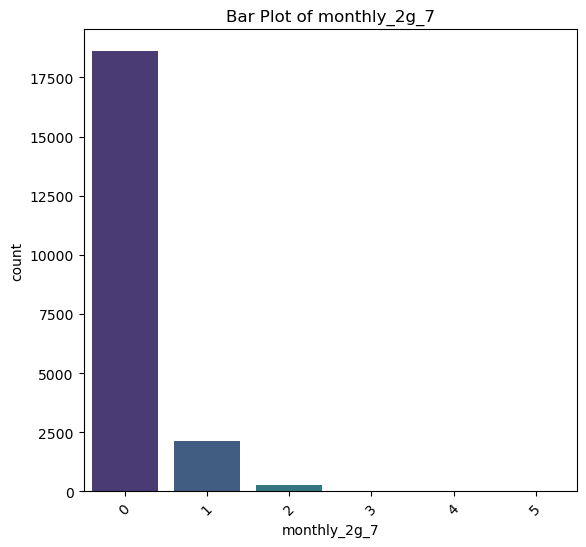


Univariate analysis for column: monthly_2g_8
Frequency Distribution:
monthly_2g_8
0    18889
1     1918
2      191
3       16
4        3
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_8
0    0.898706
1    0.091255
2    0.009087
3    0.000761
4    0.000143
5    0.000048
Name: proportion, dtype: float64


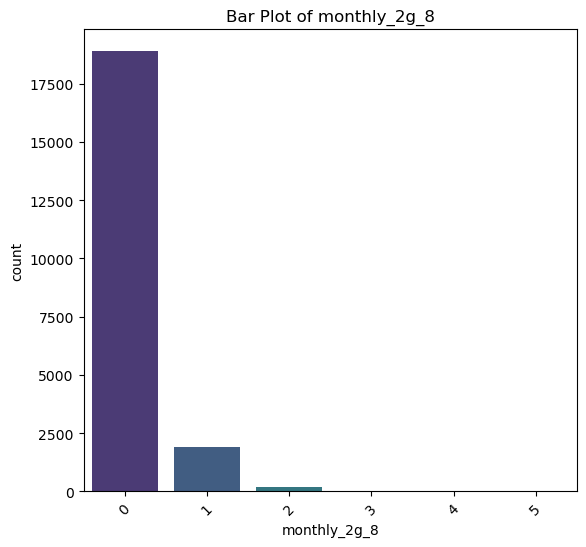


Univariate analysis for column: sachet_2g_6
Frequency Distribution:
sachet_2g_6
0     17389
1      1640
2       718
3       421
4       263
5       146
6       101
7        75
8        60
9        47
10       35
12       33
11       21
13       12
14       11
15        9
17        8
19        7
16        6
18        4
21        3
25        3
22        2
24        1
30        1
32        1
34        1
20        0
28        0
42        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_6
0     0.827338
1     0.078028
2     0.034161
3     0.020030
4     0.012513
5     0.006946
6     0.004805
7     0.003568
8     0.002855
9     0.002236
10    0.001665
12    0.001570
11    0.000999
13    0.000571
14    0.000523
15    0.000428
17    0.000381
19    0.000333
16    0.000285
18    0.000190
21    0.000143
25    0.000143
22    0.000095
24    0.000048
30    0.000048
32    0.000048
34    0.000048
20    0.000000
28    0.000000
42    0.000000
Name: proportion, dtype: float64


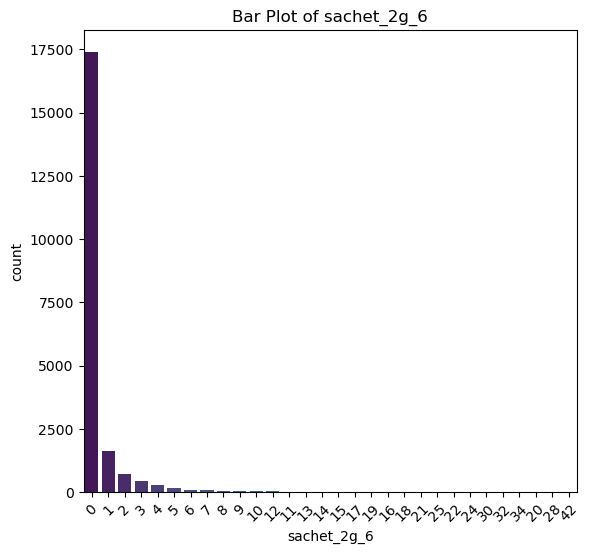


Univariate analysis for column: sachet_2g_7
Frequency Distribution:
sachet_2g_7
0     17233
1      1550
2       661
3       413
4       305
5       247
6       179
7       122
8        80
10       50
9        41
11       33
12       20
14       15
15       13
13       10
19        6
20        6
18        6
16        5
17        5
26        3
27        3
21        2
22        2
23        2
25        1
30        1
32        1
35        1
42        1
48        1
24        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_7
0     0.819916
1     0.073746
2     0.031449
3     0.019650
4     0.014511
5     0.011752
6     0.008517
7     0.005805
8     0.003806
10    0.002379
9     0.001951
11    0.001570
12    0.000952
14    0.000714
15    0.000619
13    0.000476
19    0.000285
20    0.000285
18    0.000285
16    0.000238
17    0.000238
26    0.000143
27    0.000143
21    0.000095
22    0.000095
23    0.000095
25    0.000048
30    0.000048
32    0.000048
35    0.000048
42   

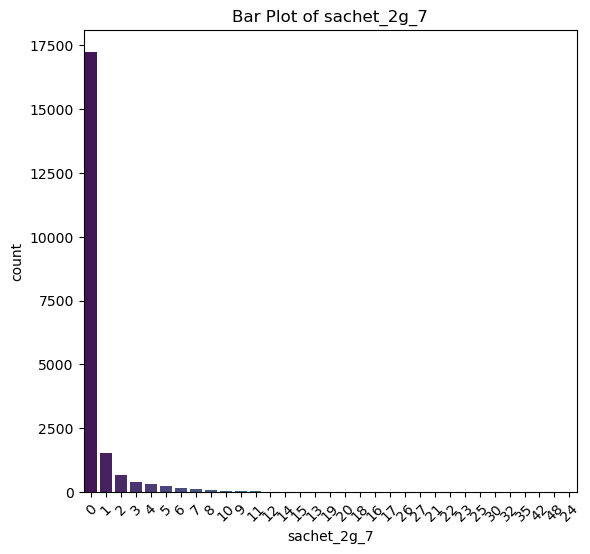


Univariate analysis for column: sachet_2g_8
Frequency Distribution:
sachet_2g_8
0     16764
1      1896
2       670
3       450
4       393
5       298
6       184
7        90
8        69
9        47
10       33
11       26
12       23
15       12
14       11
13       10
16        9
18        6
17        5
19        4
20        4
22        2
24        2
27        2
29        2
21        1
23        1
31        1
32        1
34        1
44        1
25        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_8
0     0.797602
1     0.090208
2     0.031877
3     0.021410
4     0.018698
5     0.014178
6     0.008754
7     0.004282
8     0.003283
9     0.002236
10    0.001570
11    0.001237
12    0.001094
15    0.000571
14    0.000523
13    0.000476
16    0.000428
18    0.000285
17    0.000238
19    0.000190
20    0.000190
22    0.000095
24    0.000095
27    0.000095
29    0.000095
21    0.000048
23    0.000048
31    0.000048
32    0.000048
34    0.000048
44    0.000048
25

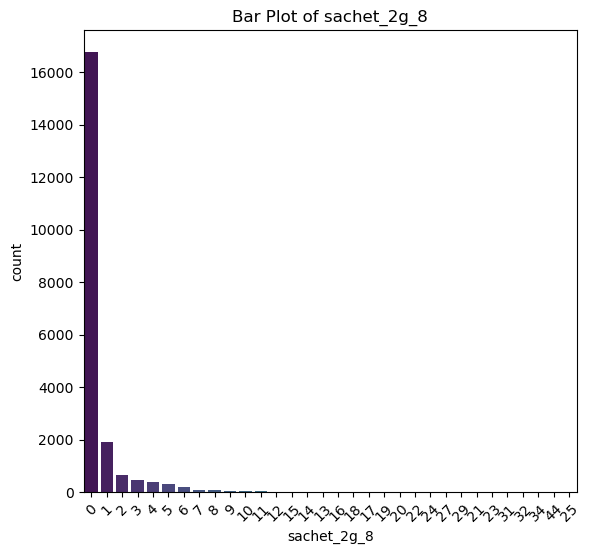


Univariate analysis for column: monthly_3g_6
Frequency Distribution:
monthly_3g_6
0    18533
1     1770
2      476
3      145
4       58
5       15
6        9
7        8
8        2
9        2
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_6
0    0.881768
1    0.084214
2    0.022647
3    0.006899
4    0.002760
5    0.000714
6    0.000428
7    0.000381
8    0.000095
9    0.000095
Name: proportion, dtype: float64


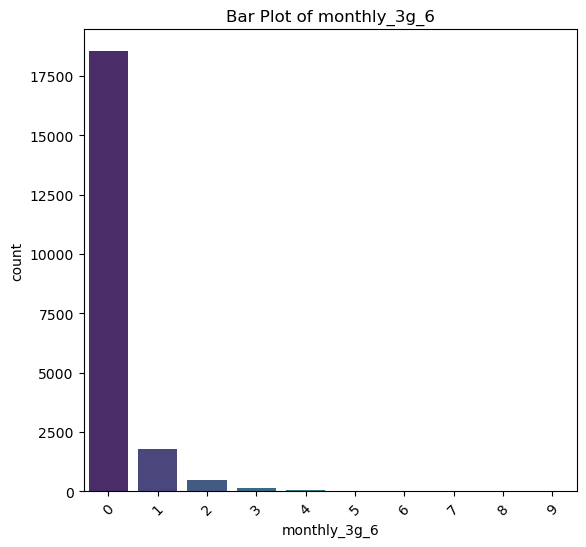


Univariate analysis for column: monthly_3g_7
Frequency Distribution:
monthly_3g_7
0     18495
1      1698
2       575
3       148
4        44
5        25
6        17
7         6
8         4
9         3
10        1
14        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_7
0     0.879960
1     0.080788
2     0.027358
3     0.007042
4     0.002093
5     0.001189
6     0.000809
7     0.000285
8     0.000190
9     0.000143
10    0.000048
14    0.000048
16    0.000048
Name: proportion, dtype: float64


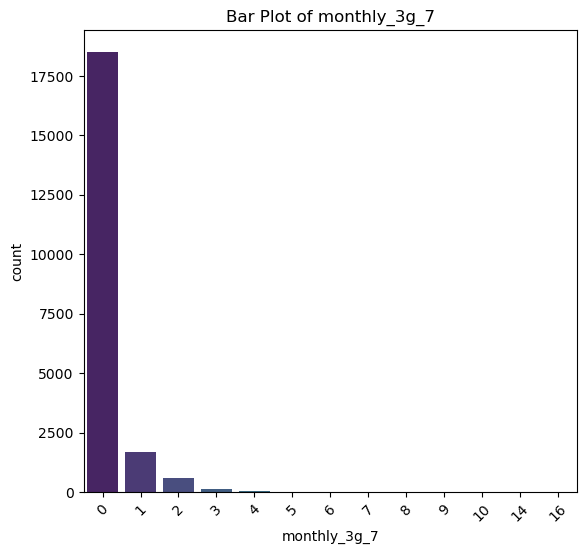


Univariate analysis for column: monthly_3g_8
Frequency Distribution:
monthly_3g_8
0     18625
1      1647
2       505
3       144
4        56
5        22
6         7
7         5
8         3
9         2
10        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_8
0     0.886145
1     0.078361
2     0.024027
3     0.006851
4     0.002664
5     0.001047
6     0.000333
7     0.000238
8     0.000143
9     0.000095
10    0.000048
16    0.000048
Name: proportion, dtype: float64


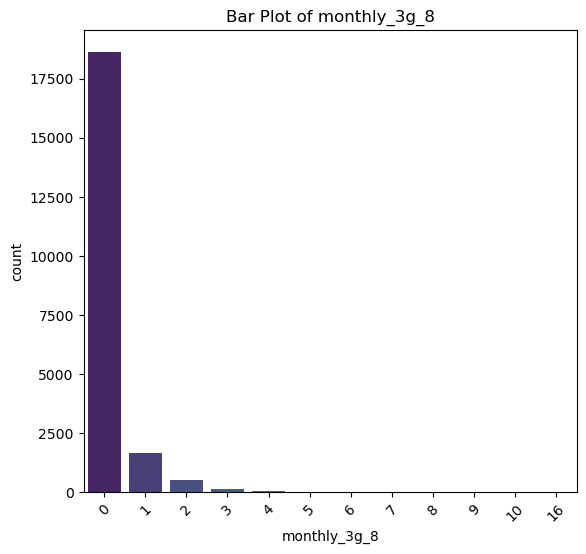


Univariate analysis for column: sachet_3g_6
Frequency Distribution:
sachet_3g_6
0     19638
1       898
2       222
3        81
4        47
5        25
7        25
6        20
8        13
9        11
11        7
10        6
15        4
12        3
13        3
14        3
19        3
23        3
29        2
16        1
17        1
18        1
22        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_6
0     0.934342
1     0.042725
2     0.010562
3     0.003854
4     0.002236
5     0.001189
7     0.001189
6     0.000952
8     0.000619
9     0.000523
11    0.000333
10    0.000285
15    0.000190
12    0.000143
13    0.000143
14    0.000143
19    0.000143
23    0.000143
29    0.000095
16    0.000048
17    0.000048
18    0.000048
22    0.000048
Name: proportion, dtype: float64


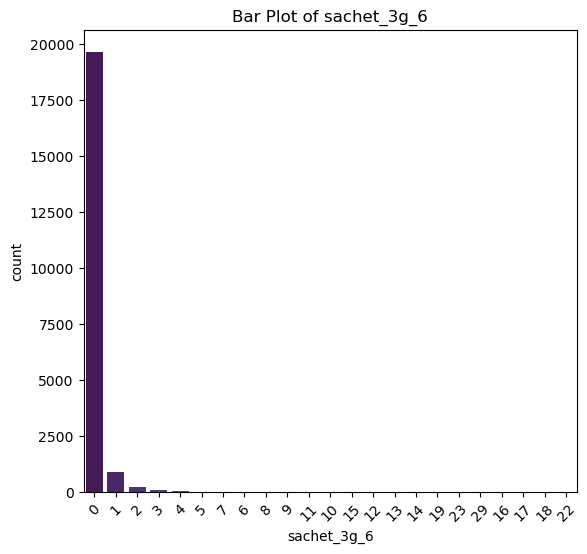


Univariate analysis for column: sachet_3g_7
Frequency Distribution:
sachet_3g_7
0     19633
1       868
2       218
3        84
4        50
5        45
6        30
7        14
11       11
9        11
8        10
10        9
12        8
14        4
20        3
15        3
22        3
18        3
24        2
13        2
17        2
19        1
21        1
16        1
31        1
33        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_7
0     0.934104
1     0.041298
2     0.010372
3     0.003997
4     0.002379
5     0.002141
6     0.001427
7     0.000666
11    0.000523
9     0.000523
8     0.000476
10    0.000428
12    0.000381
14    0.000190
20    0.000143
15    0.000143
22    0.000143
18    0.000143
24    0.000095
13    0.000095
17    0.000095
19    0.000048
21    0.000048
16    0.000048
31    0.000048
33    0.000048
Name: proportion, dtype: float64


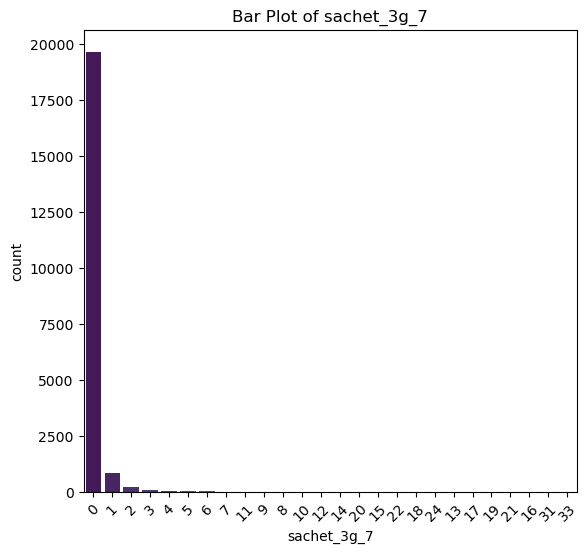


Univariate analysis for column: sachet_3g_8
Frequency Distribution:
sachet_3g_8
0     19806
1       746
2       178
3        84
4        47
5        45
6        20
8        16
7        15
12        8
13        8
9         8
10        8
11        6
15        3
20        2
23        2
21        2
14        2
18        2
17        2
16        2
19        1
25        1
29        1
30        1
38        1
41        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_8
0     0.942335
1     0.035493
2     0.008469
3     0.003997
4     0.002236
5     0.002141
6     0.000952
8     0.000761
7     0.000714
12    0.000381
13    0.000381
9     0.000381
10    0.000381
11    0.000285
15    0.000143
20    0.000095
23    0.000095
21    0.000095
14    0.000095
18    0.000095
17    0.000095
16    0.000095
19    0.000048
25    0.000048
29    0.000048
30    0.000048
38    0.000048
41    0.000048
Name: proportion, dtype: float64


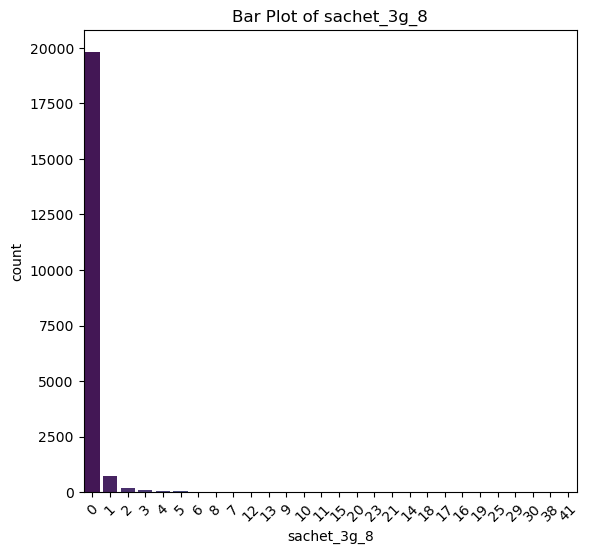


Univariate analysis for column: churn_probability
Frequency Distribution:
churn_probability
0    19159
1     1859
Name: count, dtype: int64

Proportion of Each Category:
churn_probability
0    0.911552
1    0.088448
Name: proportion, dtype: float64


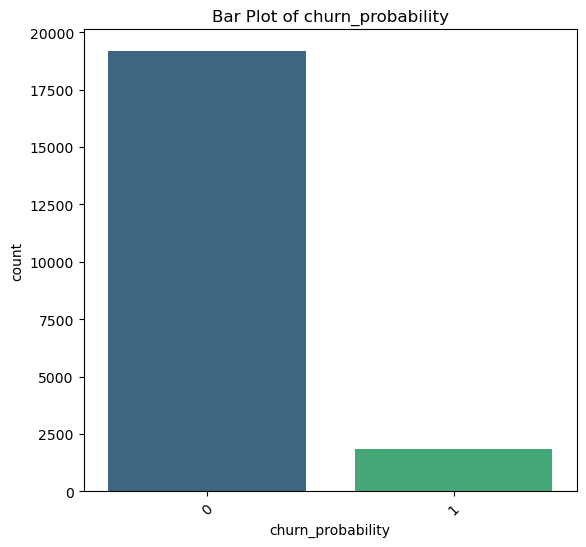

In [73]:
analysis_results = univariate_categorical_analysis(df, categorical_columns)

### Bivariate Analysis

In [ ]:
def bivariate_analysis_numerical(df, target_column, numerical_columns):
    for column in numerical_columns:
        print(f"\nBivariate analysis between {target_column} and {column}")
        
        # Calculate correlation
        correlation = df[[target_column, column]].corr().iloc[0, 1]
        print(f"Correlation between {target_column} and {column}: {correlation}")
        
        # Scatter Plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=df[column], y=df[target_column], hue=df[target_column], palette="viridis")
        plt.title(f'Scatter Plot between {target_column} and {column}')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[target_column], y=df[column], palette="viridis")
        plt.title(f'Box Plot of {column} by {target_column}')
        
        plt.show()


In [ ]:
def bivariate_analysis_categorical(df, target_column, categorical_columns):
    for column in categorical_columns:
        print(f"\nBivariate analysis between {target_column} and {column}")
        
        # Cross-tabulation for target and categorical variable
        cross_tab = pd.crosstab(df[column], df[target_column], normalize='index')
        print("Cross Tabulation:")
        print(cross_tab)
        
        # Bar Plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue=target_column, data=df, palette="viridis")
        plt.title(f'Bar Plot of {column} by {target_column}')
        plt.xticks(rotation=45)
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], y=df[target_column], palette="viridis")
        plt.title(f'Box Plot of {target_column} by {column}')
        
        plt.show()

In [67]:
categorical_columns = df.dtypes[df.dtypes == 'category'].index.values
len(categorical_columns)

13

In [ ]:
categorical_columns

In [ ]:
unique_values = df['churn_probability'].unique()
print("Unique values in 'churn_probability':", unique_values)

In [ ]:
df['churn_probability'] = pd.to_numeric(df['churn_probability'], errors='coerce')



Bivariate analysis between churn_probability and monthly_2g_6
Correlation between churn_probability and monthly_2g_6: -0.05444232100149243


TypeError: Neither the `x` nor `y` variable appears to be numeric.

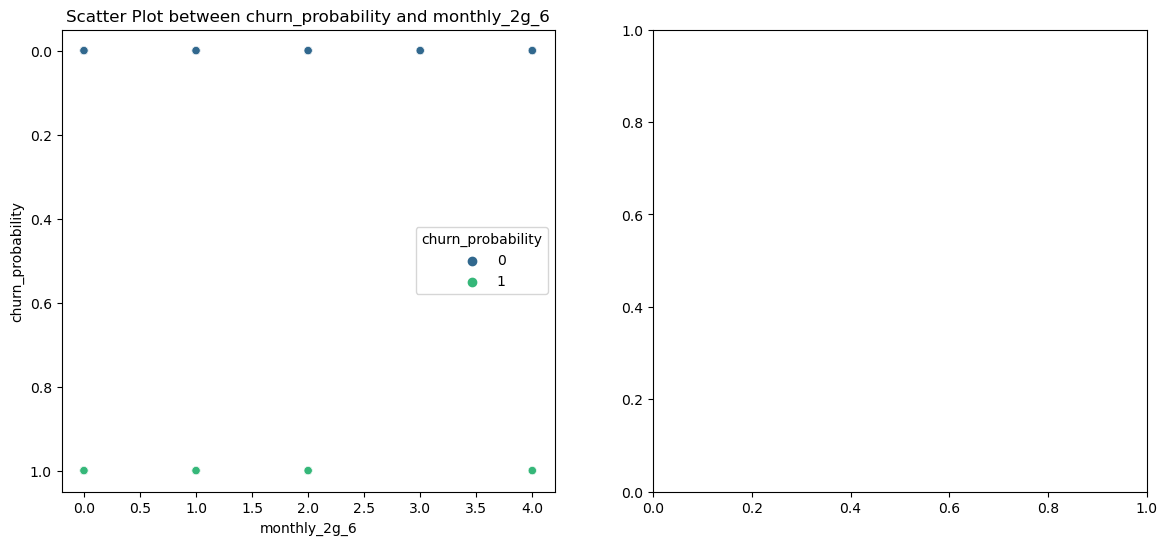

In [75]:

def bivariate_analysis(df, target_column, columns):
    for column in columns:
        if column != target_column:
            print(f"\nBivariate analysis between {target_column} and {column}")
            
            # Calculate correlation
            correlation = df[[target_column, column]].corr().iloc[0, 1]
            print(f"Correlation between {target_column} and {column}: {correlation}")
            
            # Scatter Plot
            plt.figure(figsize=(14, 6))
            plt.subplot(1, 2, 1)
            sns.scatterplot(x=df[column], y=df[target_column], hue=df[target_column], palette="viridis")
            plt.title(f'Scatter Plot between {target_column} and {column}')
            
            # Box Plot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[target_column], y=df[column], palette="viridis")
            plt.title(f'Box Plot of {column} by {target_column}')
            
            plt.show()

# Example usage:
# Assuming df is your DataFrame
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
           'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
           'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

target_column = 'churn_probability'
bivariate_analysis(df, target_column, columns)


In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

### Data Preparation

### Derived Variables


#### Outlier Treatment